# Group 11: Volcano Eruptions
###   Chance Hill - Mariana Villalobos - Vinh Pham 

In [1]:
# Import necessary modules

import pandas
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
# Read in all csv files into variables using pandas module
Eruptions = pandas.read_csv('eruptions.csv')
Events = pandas.read_csv('events.csv')
Sulfer = pandas.read_csv('sulfur.csv')
Treerings = pandas.read_csv('tree_rings.csv')
volcano = pandas.read_csv('volcano.csv')

In [3]:
# To Show Files
#Eruptions.head()
#Events.head()
#Sulfer.head()
#Treerings.head()
#volcano.head()

In [4]:
volcano.head()

,volcano_number,volcano_name,primary_volcano_type,last_eruption_year,country,region,subregion,latitude,longitude,elevation,...,major_rock_5,minor_rock_1,minor_rock_2,minor_rock_3,minor_rock_4,minor_rock_5,population_within_5_km,population_within_10_km,population_within_30_km,population_within_100_km
0,283001,Abu,Shield(s),-6850,Japan,"Japan, Taiwan, Marianas",Honshu,34.500,131.600,641,...,,,,,,,3597,9594,117805,4071152
1,355096,Acamarachi,Stratovolcano,Unknown,Chile,South America,"Northern Chile, Bolivia and Argentina",-23.292,-67.618,6023,...,,,,,,,0,7,294,9092
2,342080,Acatenango,Stratovolcano(es),1972,Guatemala,México and Central America,Guatemala,14.501,-90.876,3976,...,,Basalt / Picro-Basalt,,,,,4329,60730,1042836,7634778
3,213004,Acigol-Nevsehir,Caldera,-2080,Turkey,Mediterranean and Western Asia,Turkey,38.537,34.621,1683,...,,,,,,,127863,127863,218469,2253483
4,321040,Adams,Stratovolcano,950,United States,Canada and Western USA,USA (Washington),46.206,-121.490,3742,...,,Dacite,,,,,0,70,4019,393303


In [23]:
volcano.describe()

,volcano_number,latitude,longitude,elevation,population_within_5_km,population_within_10_km,population_within_30_km,population_within_100_km
count,958.000000,958.000000,958.000000,958.000000,9.580000e+02,9.580000e+02,9.580000e+02,9.580000e+02
mean,298585.325678,14.984680,23.537475,1867.027140,4.786046e+04,6.121775e+04,3.040444e+05,2.730174e+06
std,49792.657247,31.584983,109.852596,1401.545901,2.986690e+05,3.023860e+05,7.354221e+05,5.690981e+06
min,210010.000000,-78.500000,-179.970000,-2500.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,263025.000000,-5.401500,-78.282750,881.000000,0.000000e+00,2.325000e+01,4.080000e+02,1.139775e+04
50%,300055.500000,14.514000,36.393500,1622.500000,2.950000e+02,1.633500e+03,1.391800e+04,3.546460e+05
75%,343088.000000,40.798250,131.045500,2548.250000,4.642000e+03,2.073025e+04,2.565210e+05,2.981102e+06
max,390829.000000,71.082000,179.580000,6879.000000,5.783287e+06,5.783287e+06,7.073814e+06,4.064010e+07


In [24]:
volcano.columns

Index(['volcano_number', 'volcano_name', 'primary_volcano_type',
       'last_eruption_year', 'country', 'region', 'subregion', 'latitude',
       'longitude', 'elevation', 'tectonic_settings', 'evidence_category',
       'major_rock_1', 'major_rock_2', 'major_rock_3', 'major_rock_4',
       'major_rock_5', 'minor_rock_1', 'minor_rock_2', 'minor_rock_3',
       'minor_rock_4', 'minor_rock_5', 'population_within_5_km',
       'population_within_10_km', 'population_within_30_km',
       'population_within_100_km'],
      dtype='object')

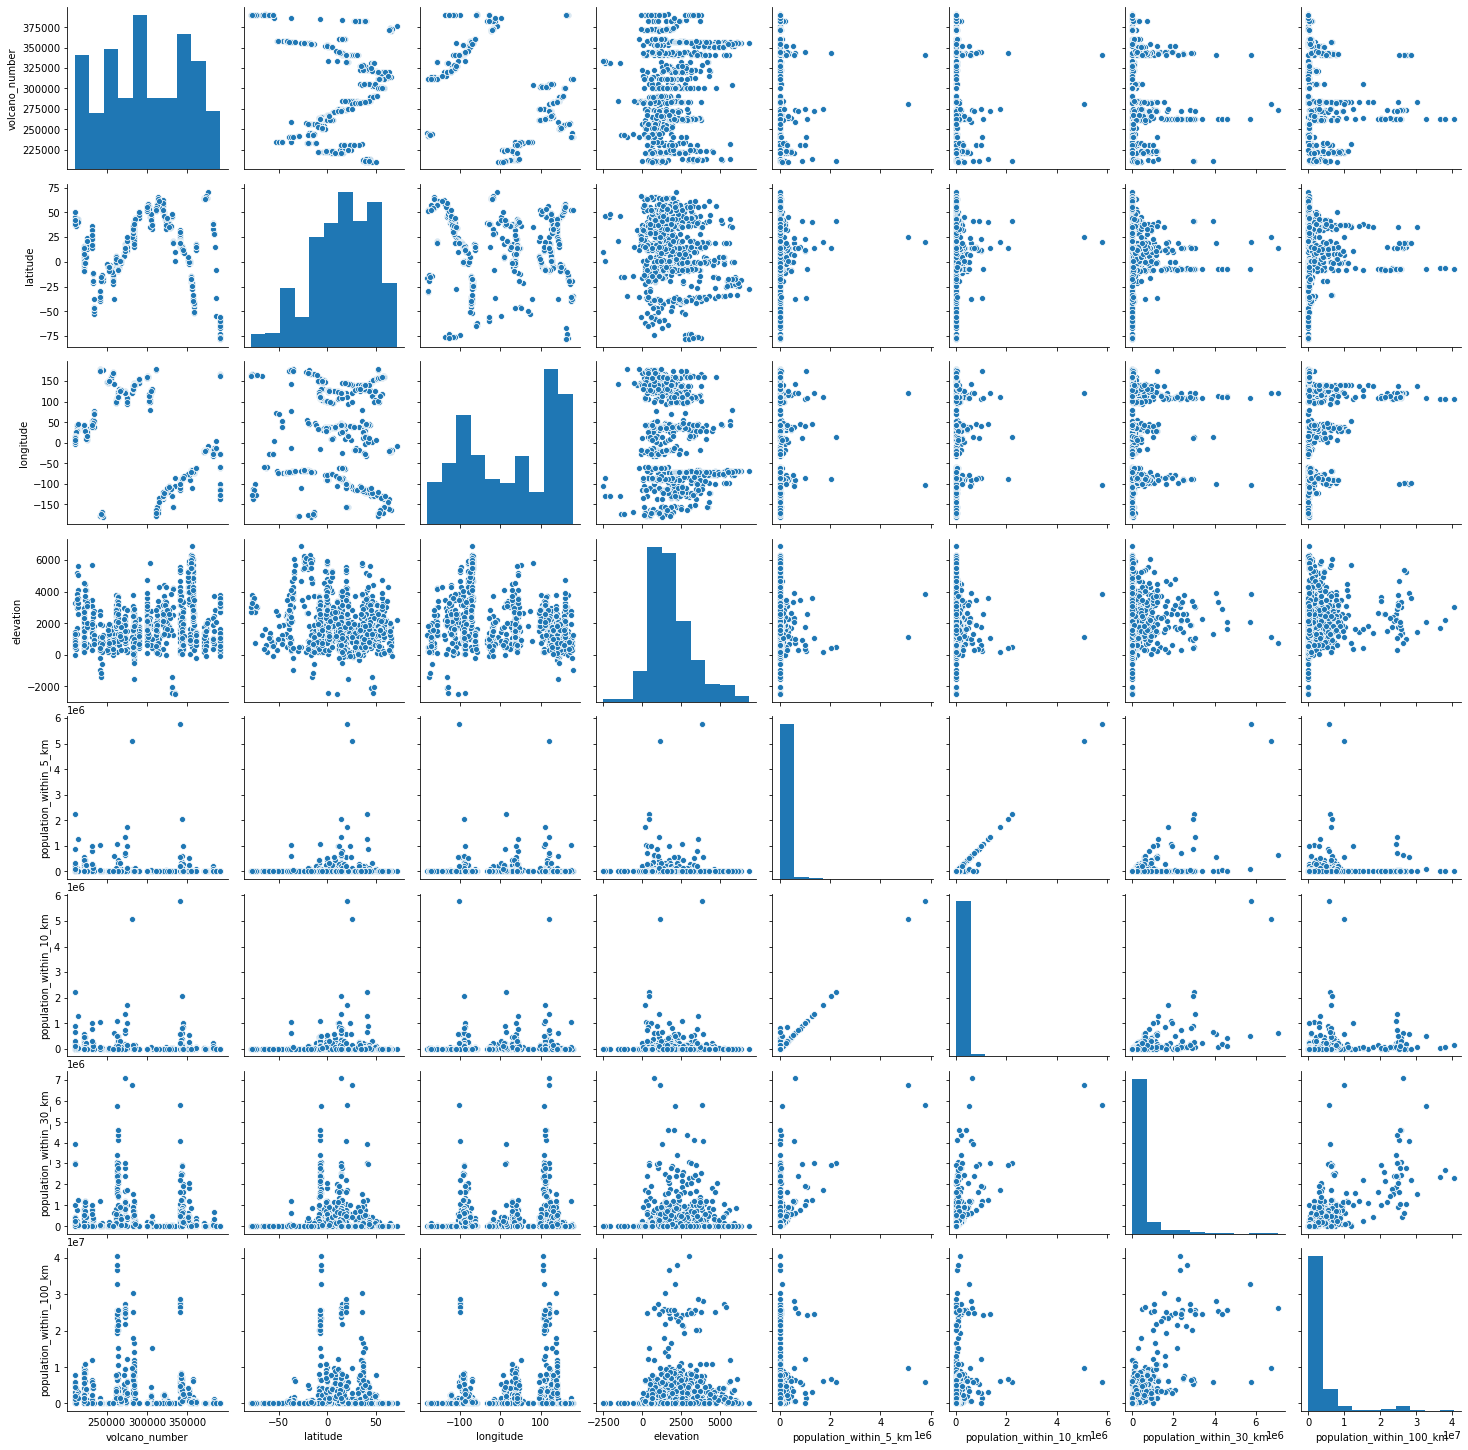

In [5]:
sns.pairplot(volcano)
plt.savefig('Volcano_pairplots.png');

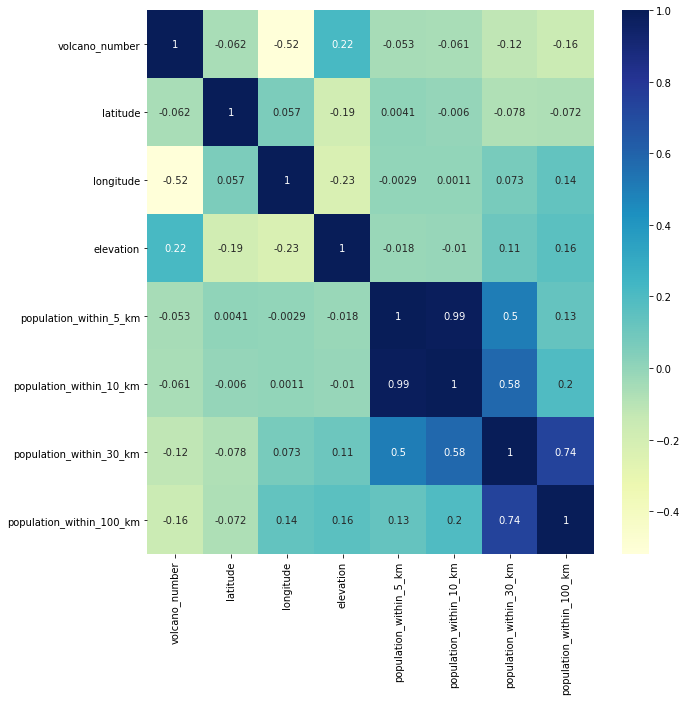

In [6]:
plt.figure(figsize=(10, 10))
correlation = volcano.corr()
sns.heatmap(correlation, cmap='YlGnBu', annot=True)
plt.savefig('Volcano_corr_heatmap.png');

In [7]:
volcano.primary_volcano_type.unique()

array(['Shield(s)', 'Stratovolcano', 'Stratovolcano(es)', 'Caldera',
       'Submarine', 'Shield', 'Volcanic field', 'Fissure vent(s)',
       'Compound', 'Complex', 'Pyroclastic shield', 'Pyroclastic cone(s)',
       'Pyroclastic cone', 'Caldera(s)', 'Lava dome(s)', 'Lava cone',
       'Crater rows', 'Maar(s)', 'Tuff cone(s)', 'Complex(es)',
       'Subglacial', 'Lava dome', 'Lava cone(s)', 'Tuff cone',
       'Lava cone(es)', 'Stratovolcano?'], dtype=object)

In [8]:
volcano.primary_volcano_type = volcano.primary_volcano_type.replace({'Pyroclastic shield':'Pyro shield', 'Pyroclastic cone(s)':'Pyro cone(s)', 'Pyroclastic cone':'Pyro cone'})
volcano.primary_volcano_type.unique()

array(['Shield(s)', 'Stratovolcano', 'Stratovolcano(es)', 'Caldera',
       'Submarine', 'Shield', 'Volcanic field', 'Fissure vent(s)',
       'Compound', 'Complex', 'Pyro shield', 'Pyro cone(s)', 'Pyro cone',
       'Caldera(s)', 'Lava dome(s)', 'Lava cone', 'Crater rows',
       'Maar(s)', 'Tuff cone(s)', 'Complex(es)', 'Subglacial',
       'Lava dome', 'Lava cone(s)', 'Tuff cone', 'Lava cone(es)',
       'Stratovolcano?'], dtype=object)

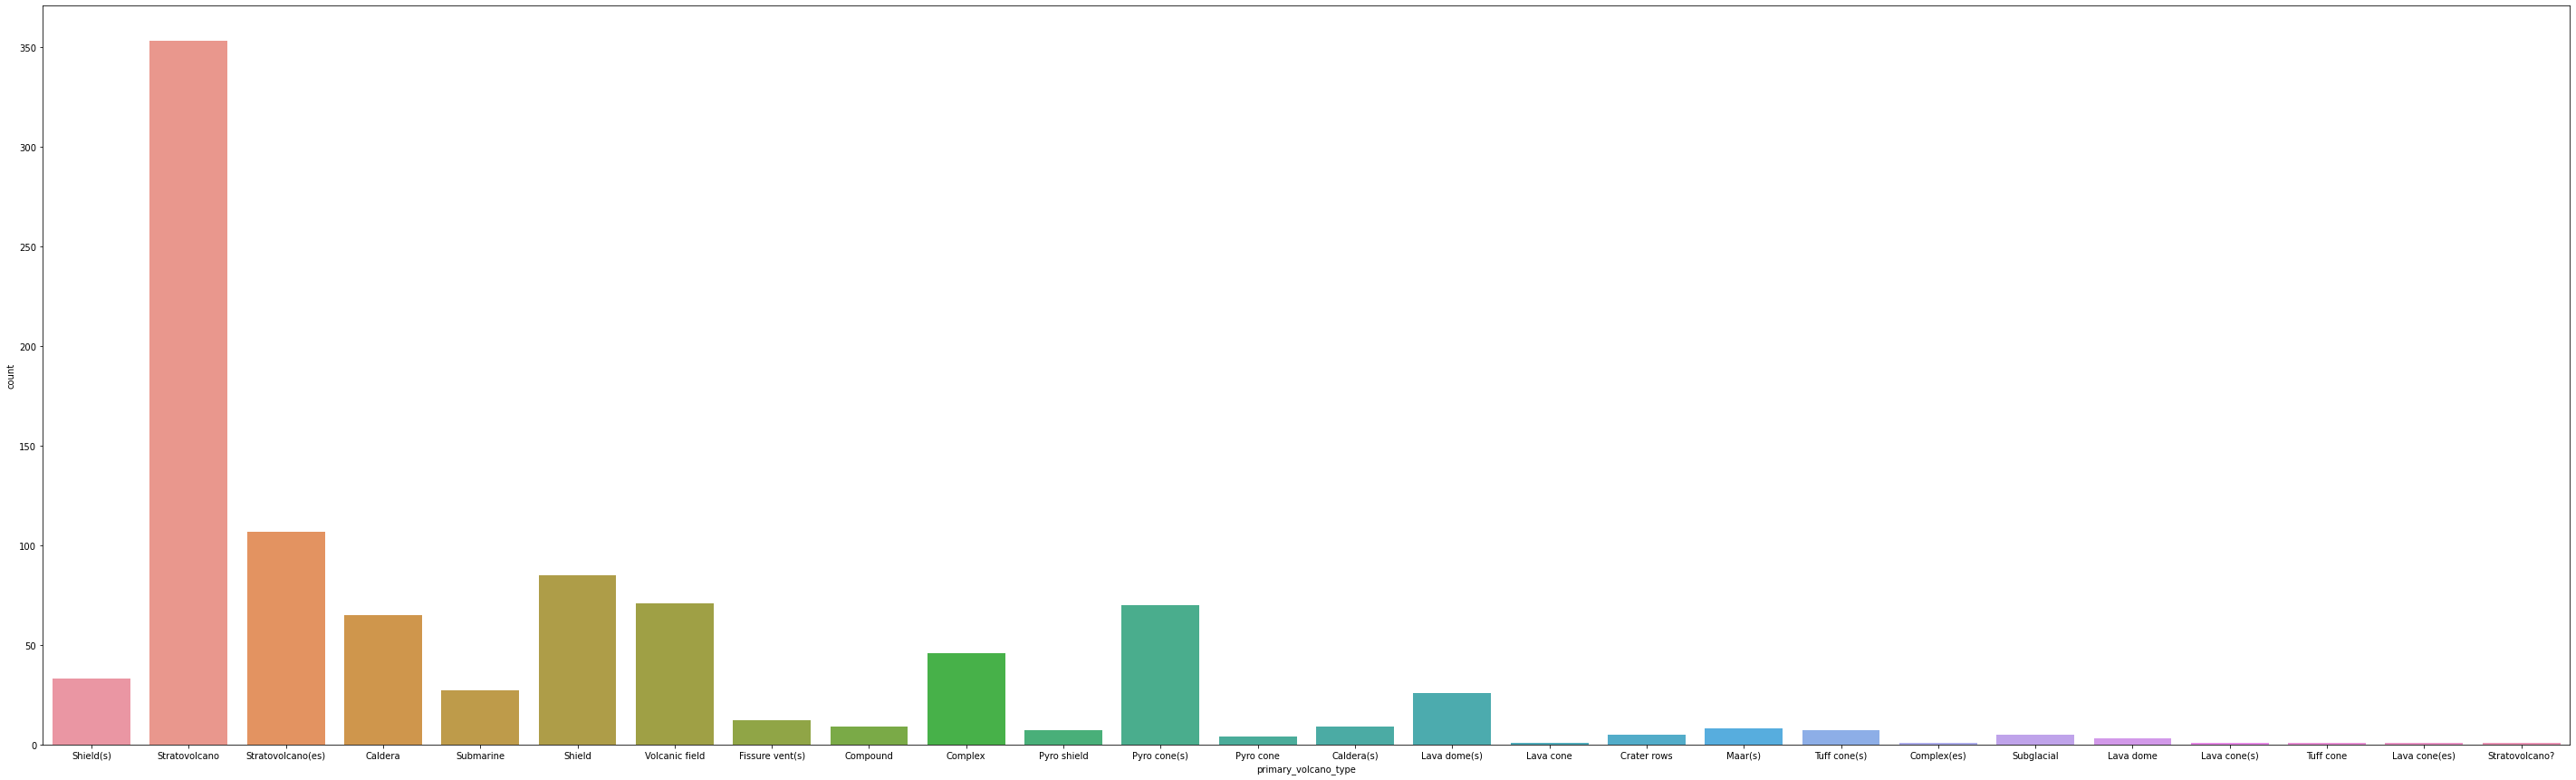

In [9]:
plt.figure(figsize=(50, 15))
sns.countplot(volcano.primary_volcano_type)
plt.savefig('Volcano_primary_volcano_type_count.png');

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


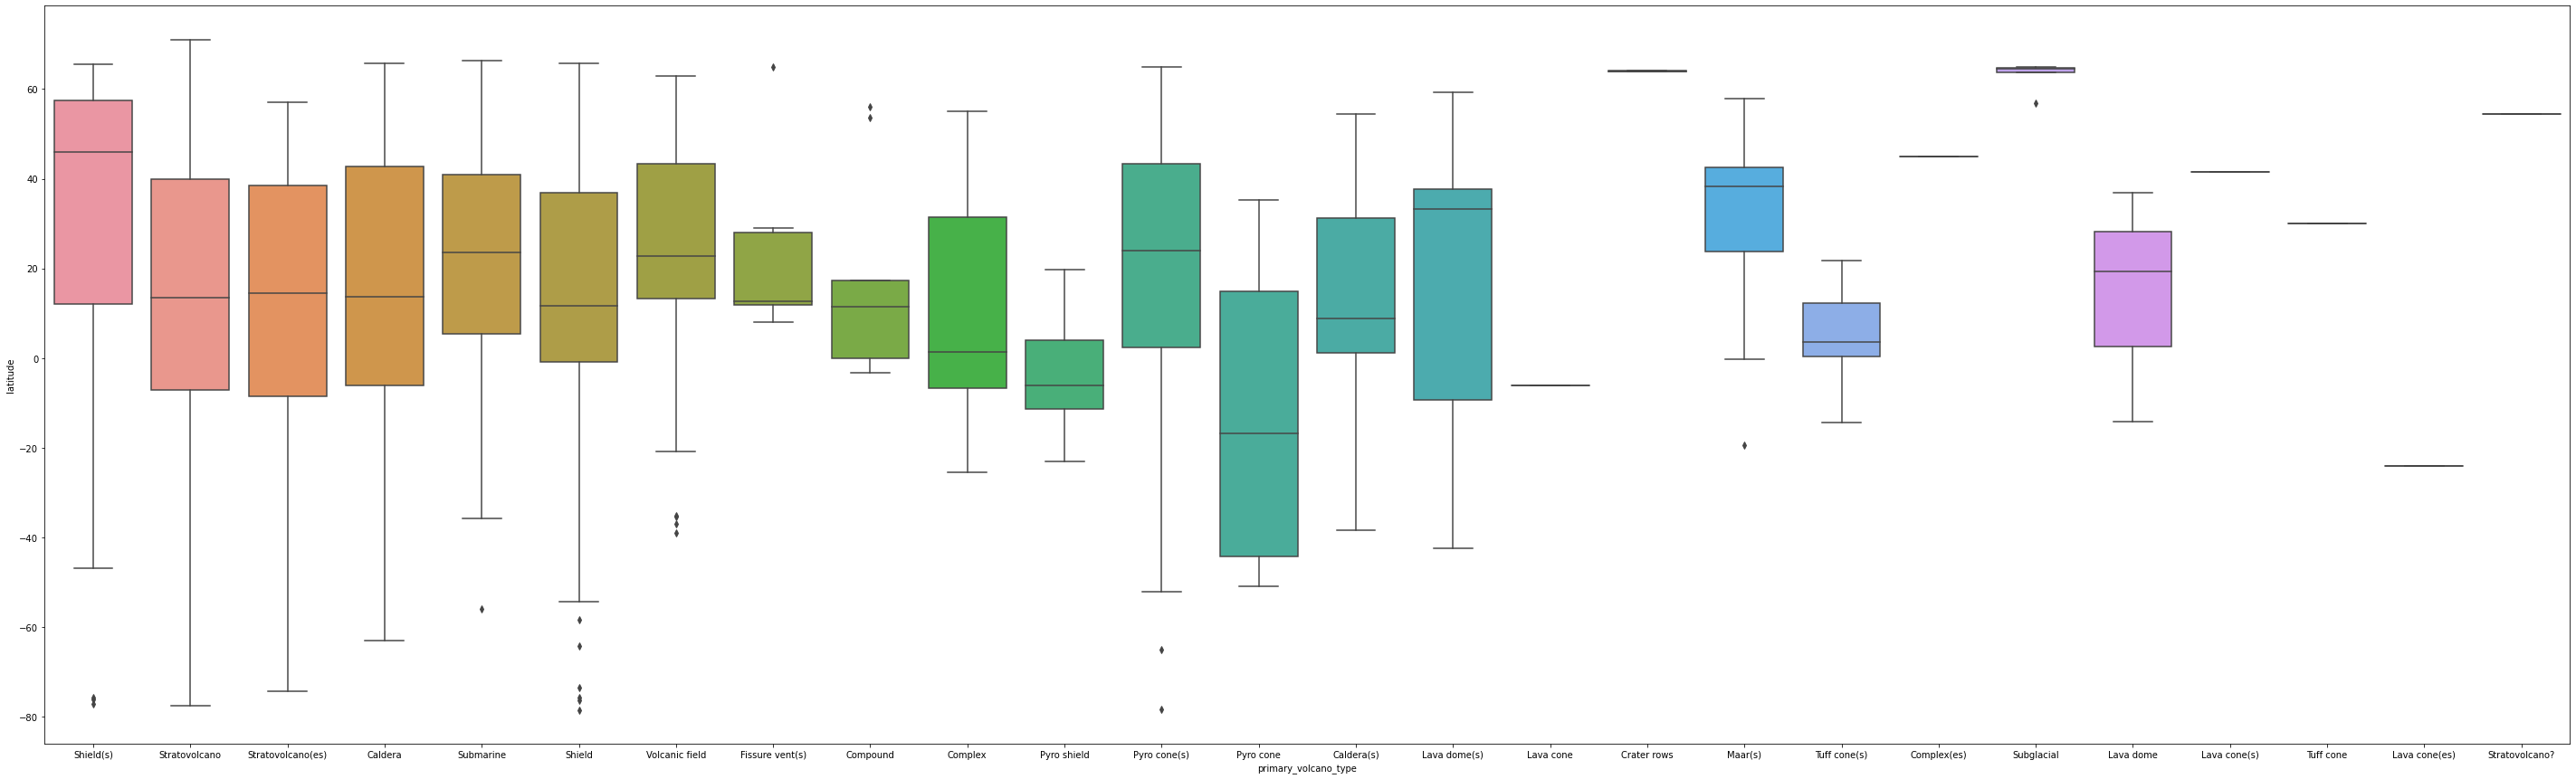

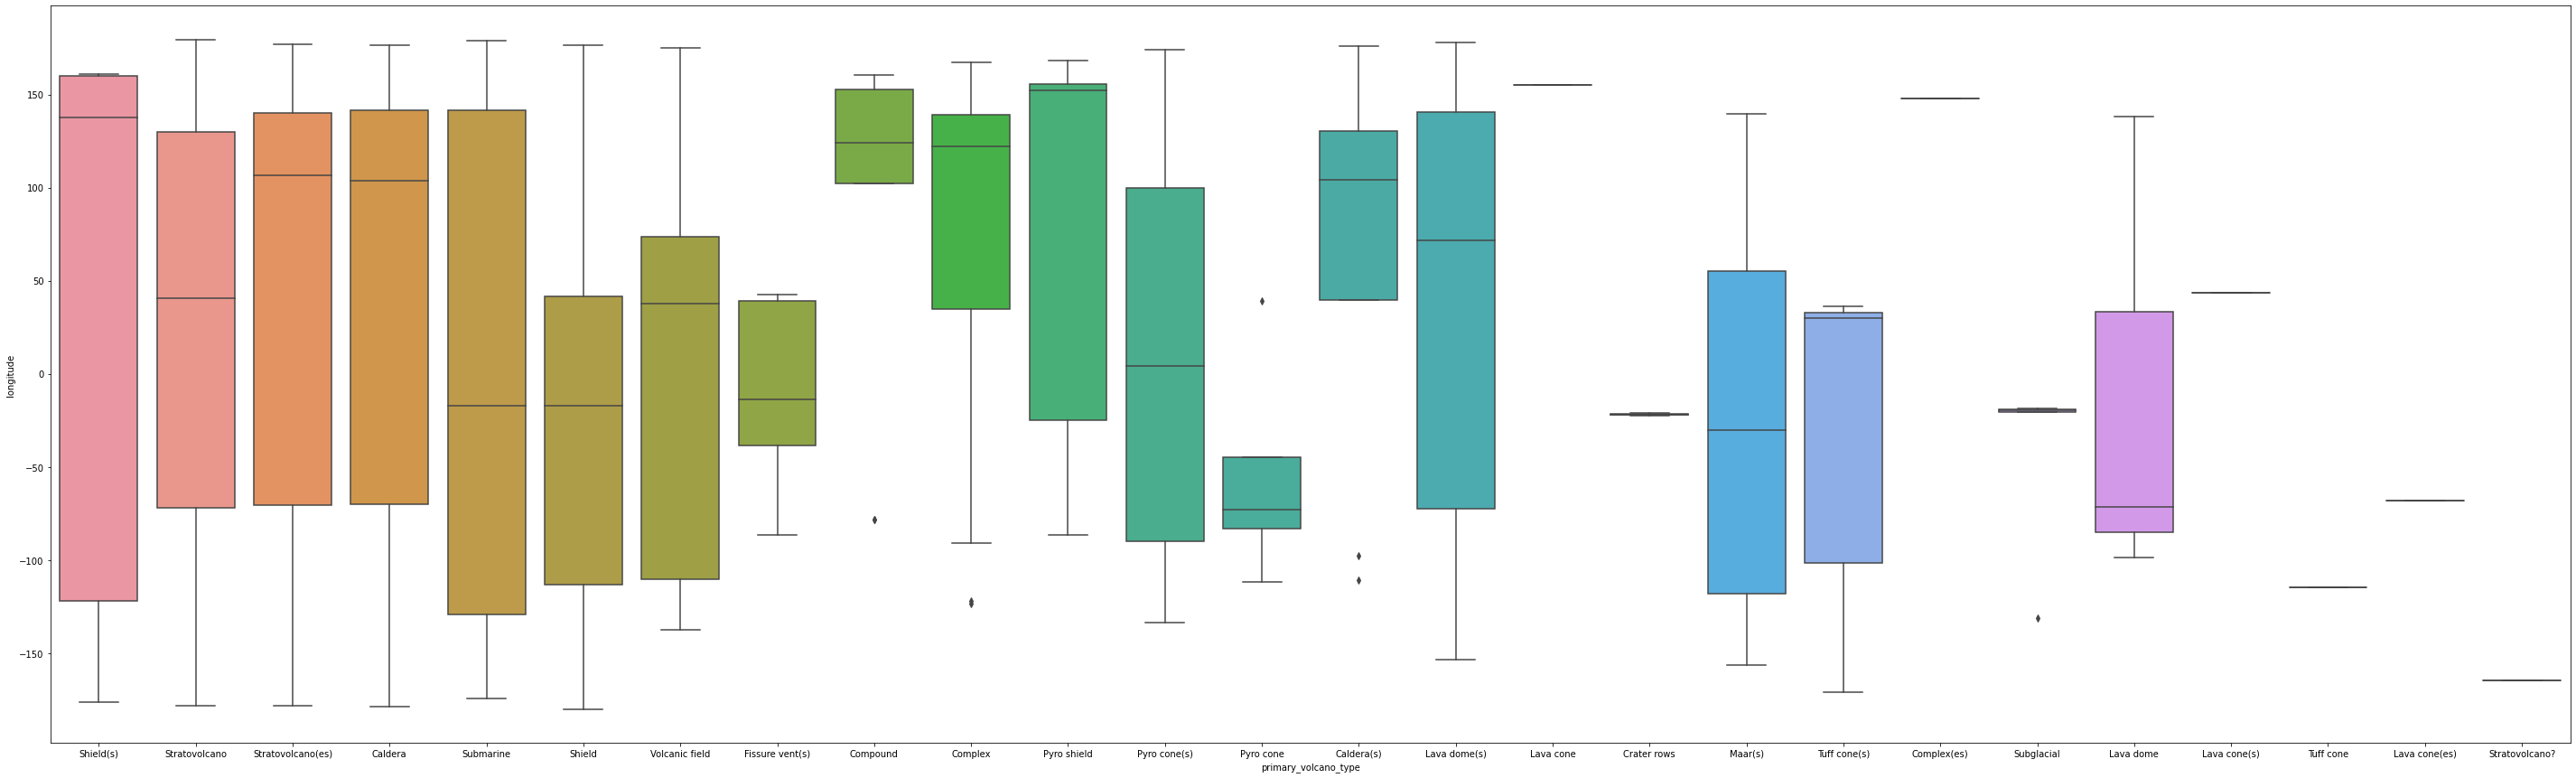

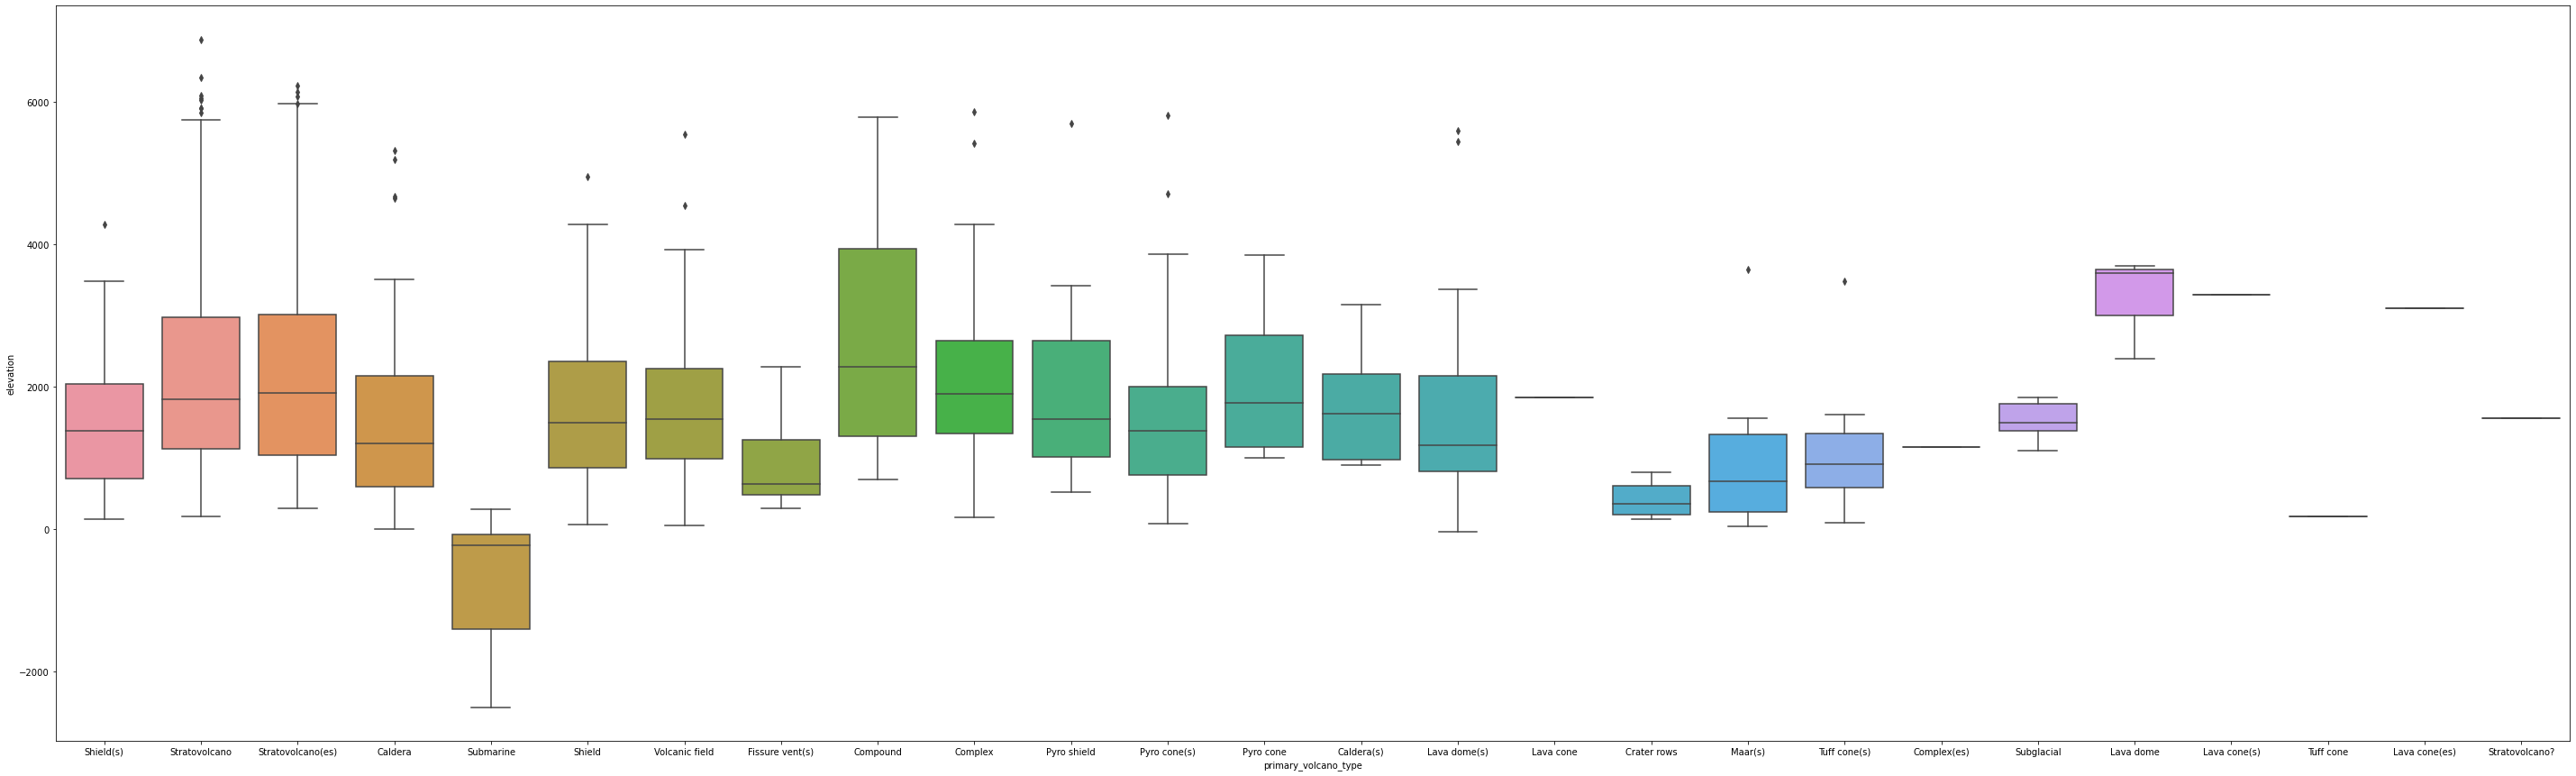

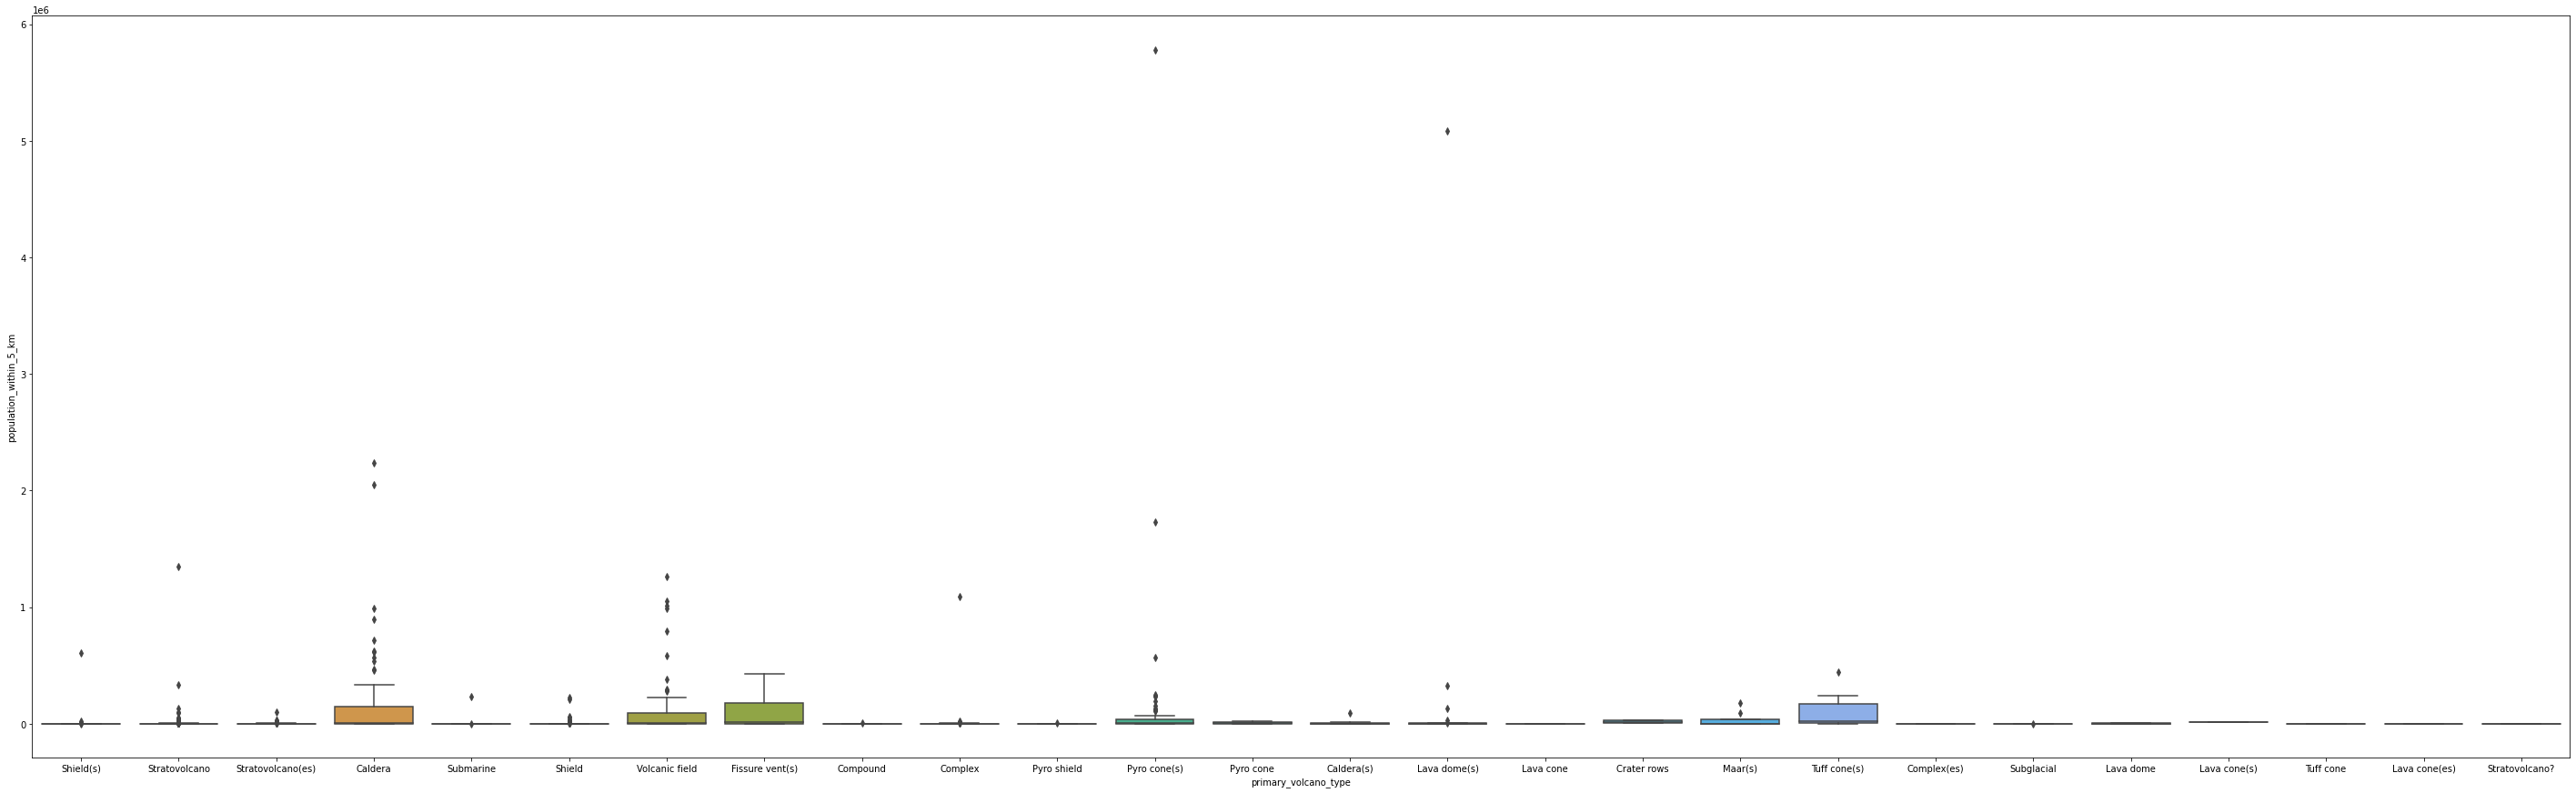

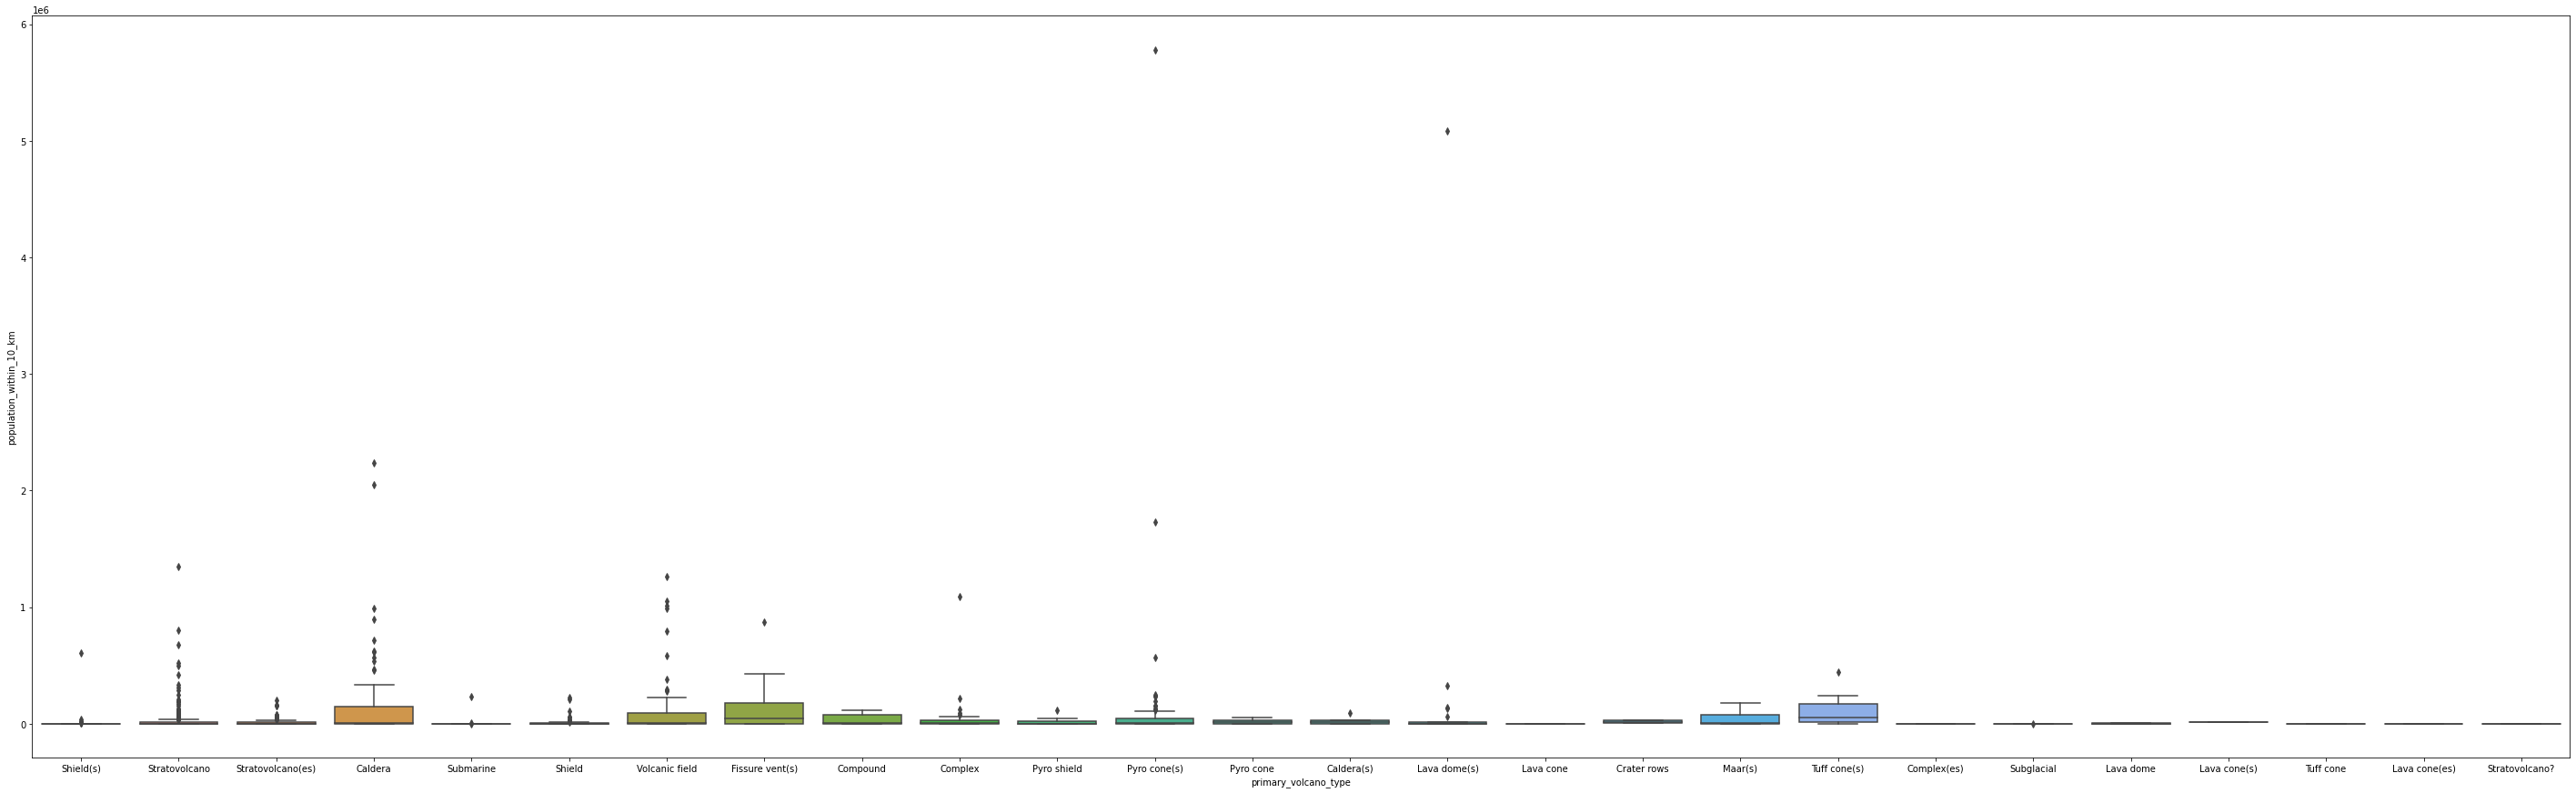

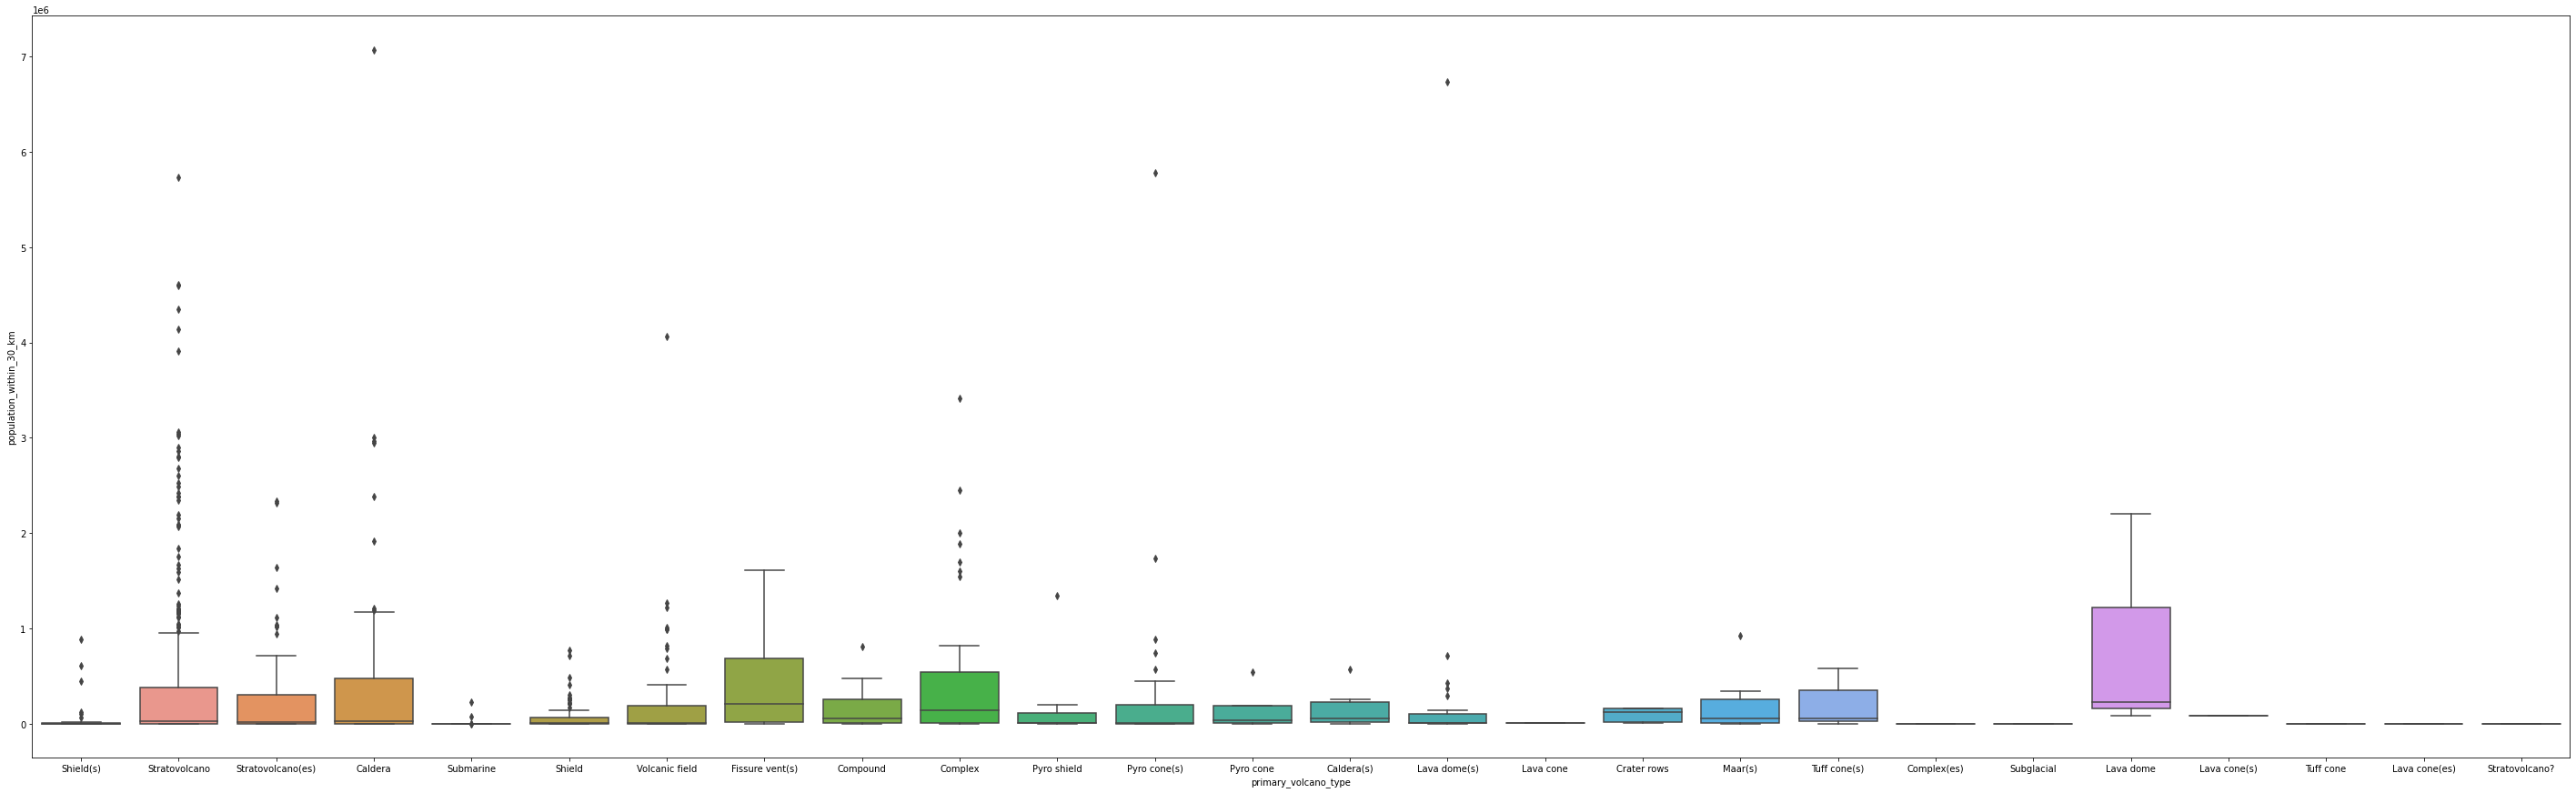

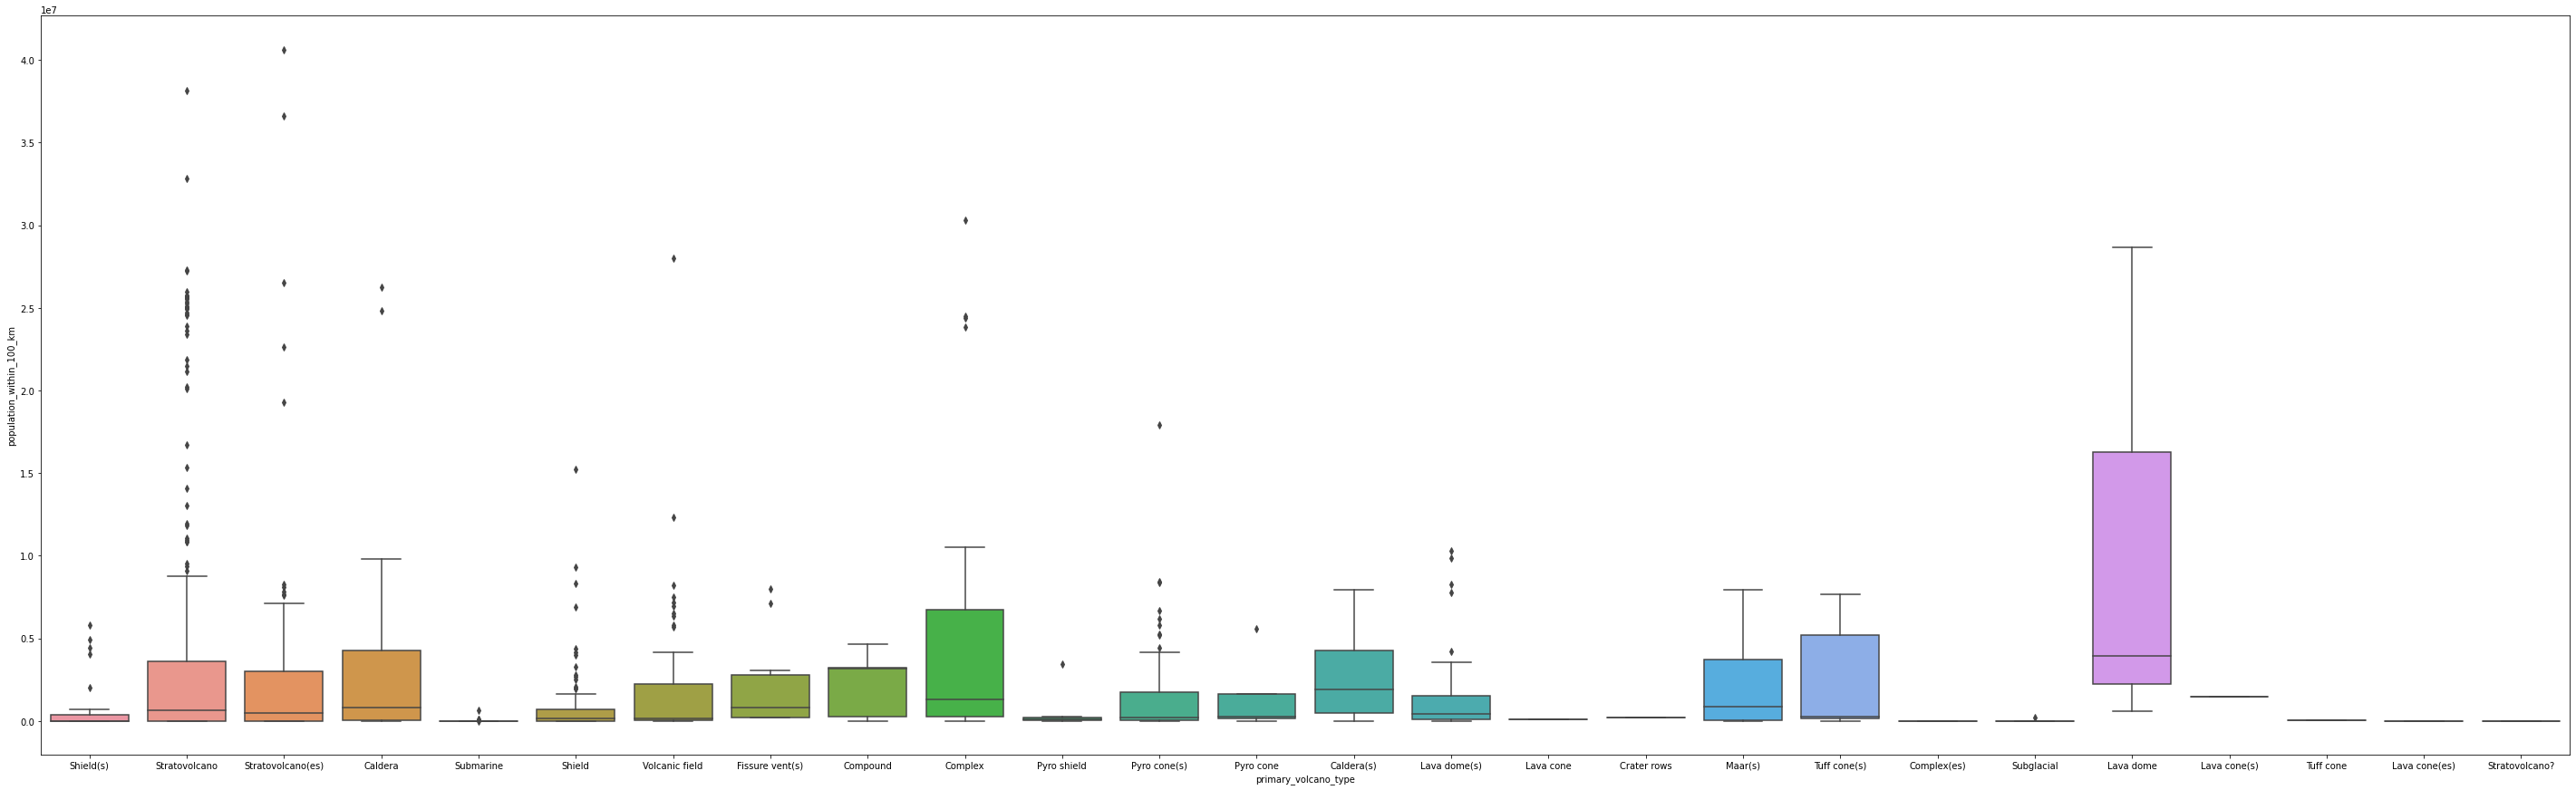

In [29]:
quant_names = ['latitude', 'longitude', 'elevation', 'population_within_5_km', 'population_within_10_km', 'population_within_30_km', 'population_within_100_km']

for col in quant_names:
    plt.figure(figsize=(50, 15))
    print(sns.boxplot(data=volcano, x='primary_volcano_type', y=col))

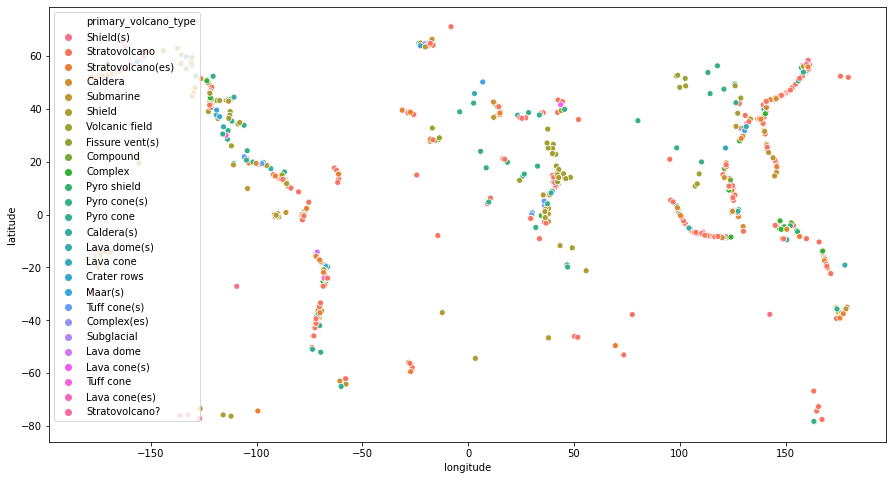

In [10]:
plt.figure(figsize=(15, 8))
sns.scatterplot(volcano.longitude, volcano.latitude, hue=volcano.primary_volcano_type)

In [11]:
volcano.tectonic_settings.unique()

array(['Subduction zone / Continental crust (>25 km)',
       'Intraplate / Continental crust (>25 km)',
       'Rift zone / Intermediate crust (15-25 km)',
       'Subduction zone / Crustal thickness unknown',
       'Rift zone / Oceanic crust (< 15 km)',
       'Subduction zone / Oceanic crust (< 15 km)',
       'Subduction zone / Intermediate crust (15-25 km)',
       'Rift zone / Continental crust (>25 km)',
       'Intraplate / Oceanic crust (< 15 km)',
       'Intraplate / Intermediate crust (15-25 km)', 'Unknown'],
      dtype=object)

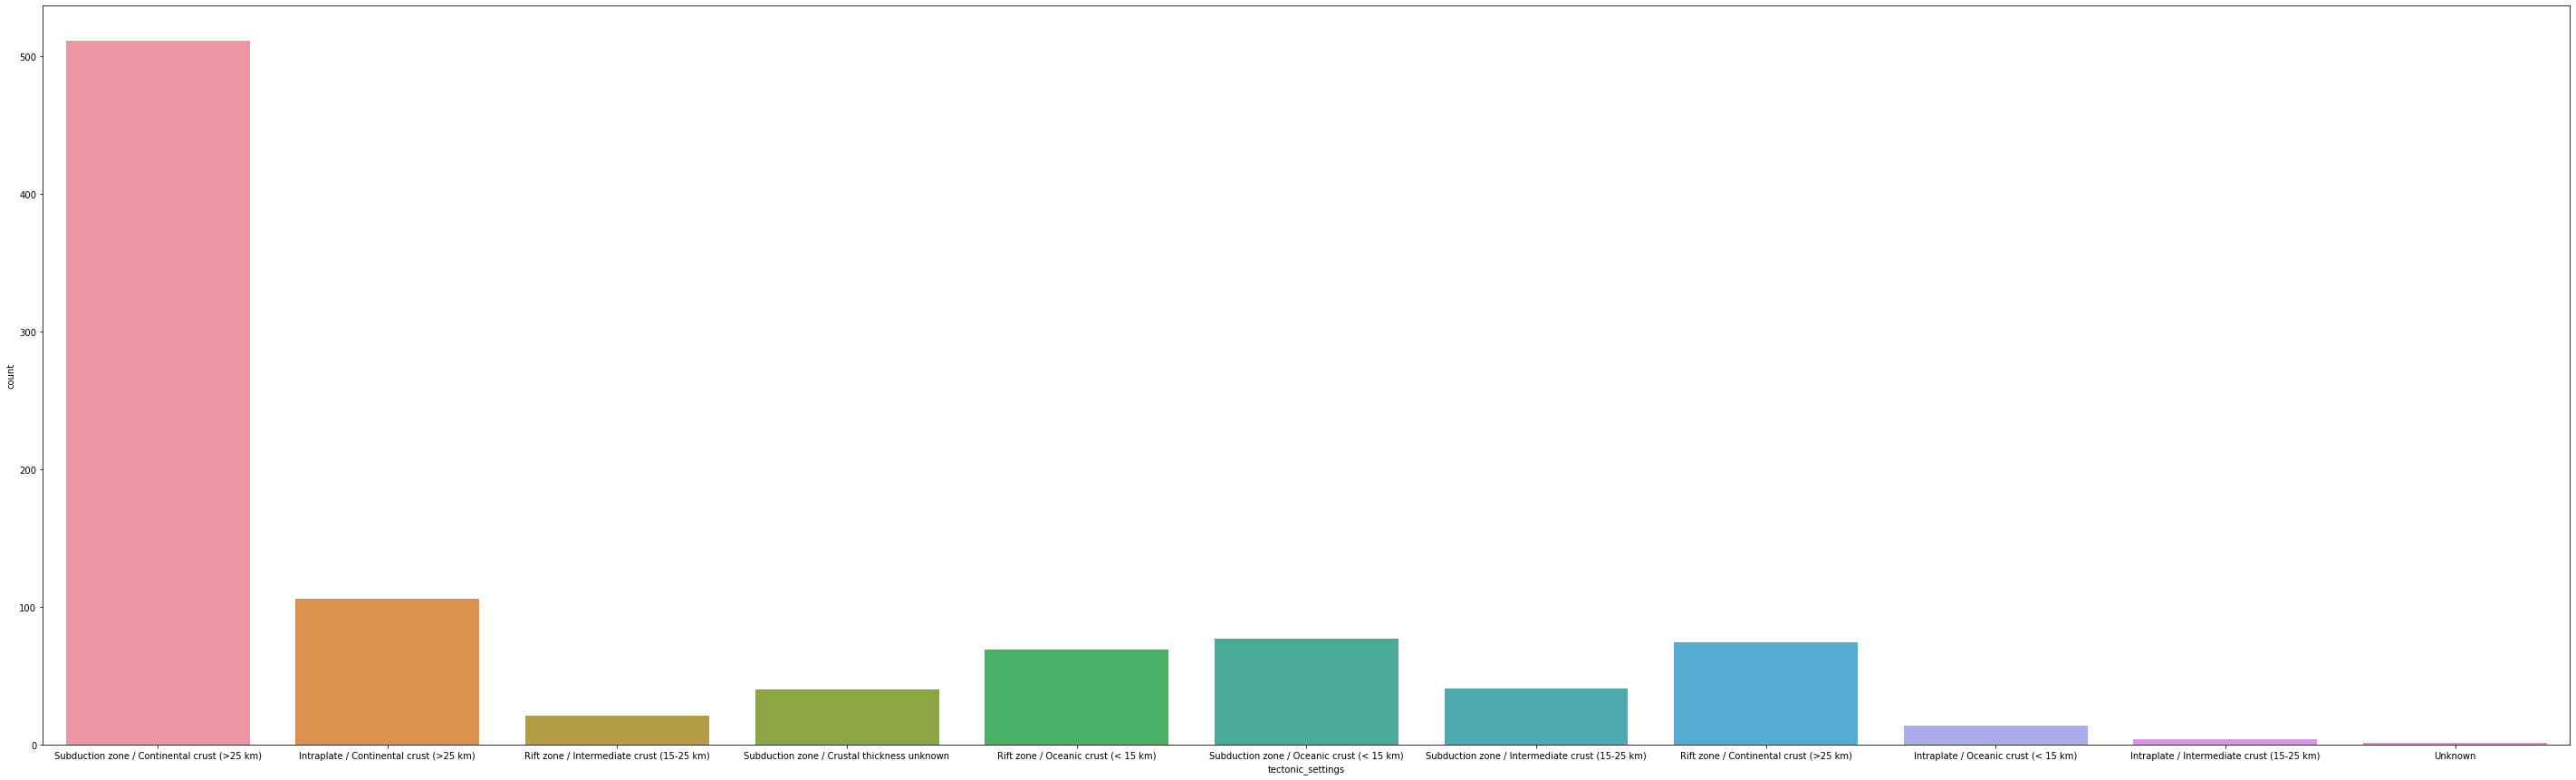

In [12]:
plt.figure(figsize=(50, 15))
sns.countplot(volcano.tectonic_settings)
plt.savefig('Volcano_tectonic_settings_count.png');

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


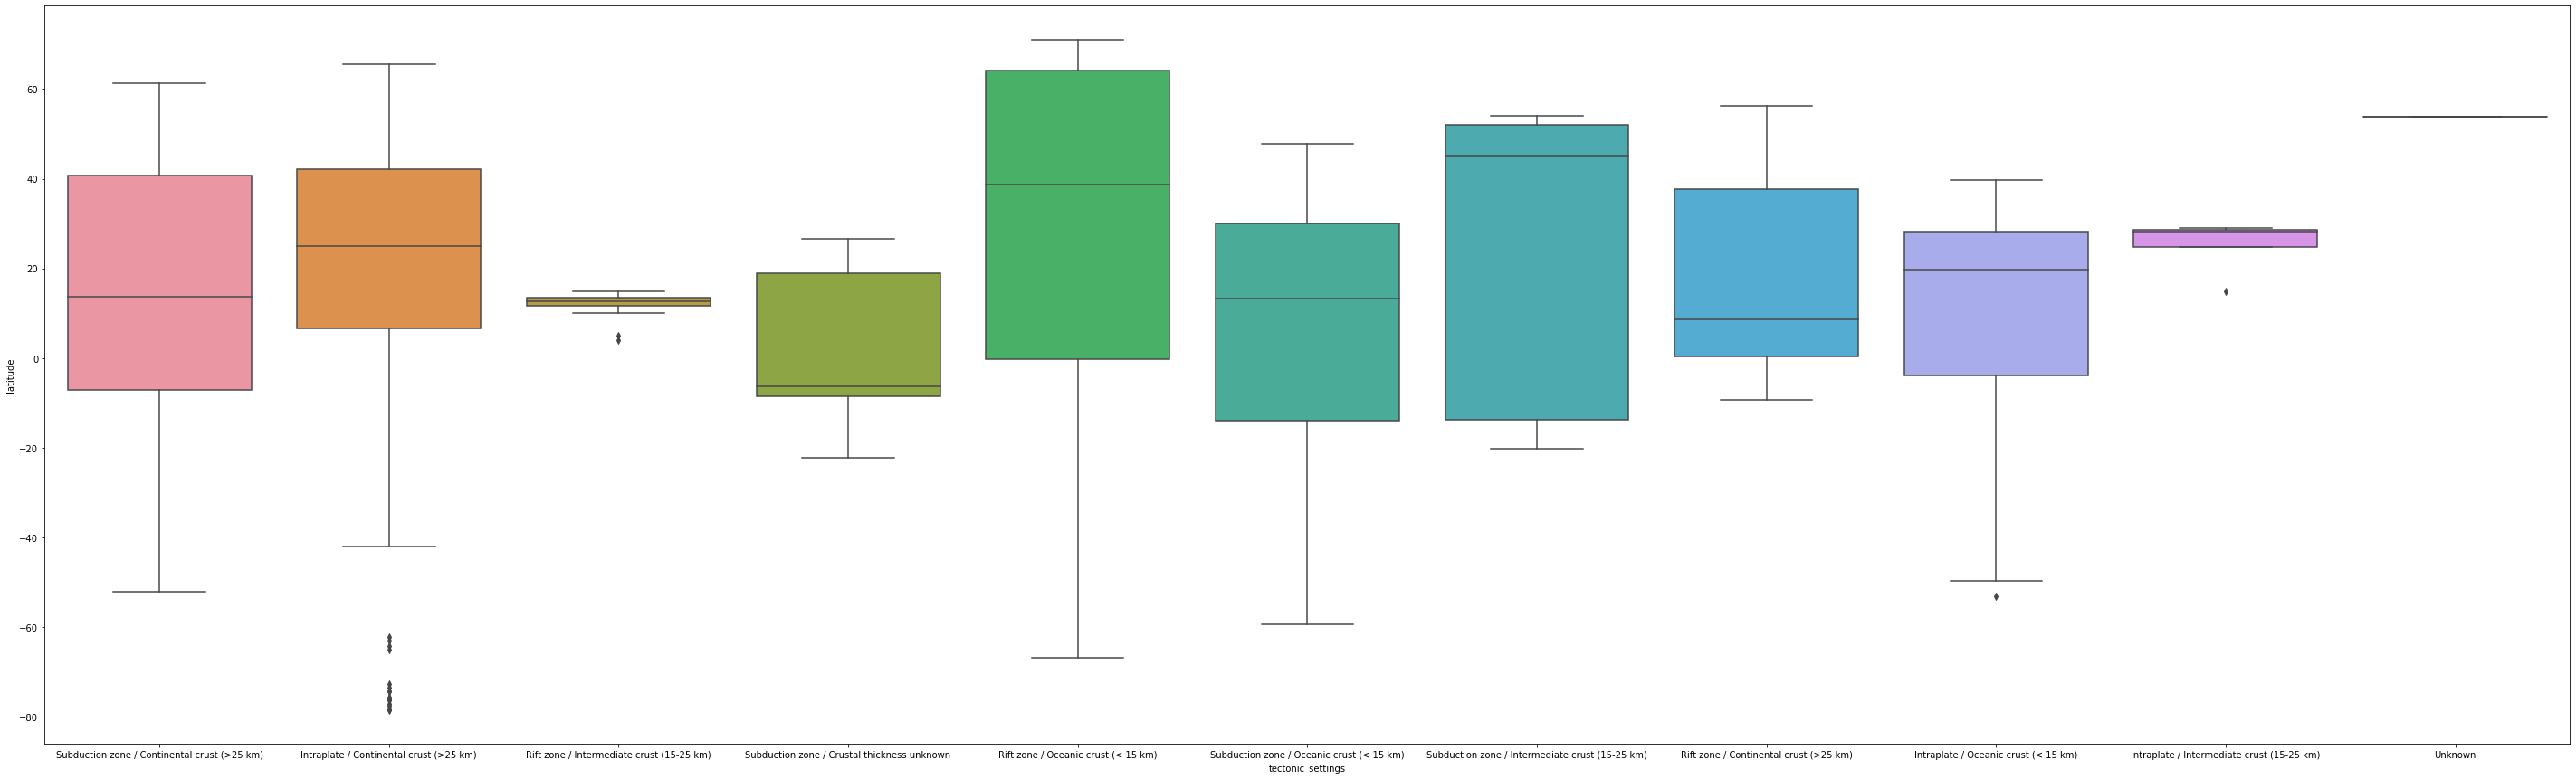

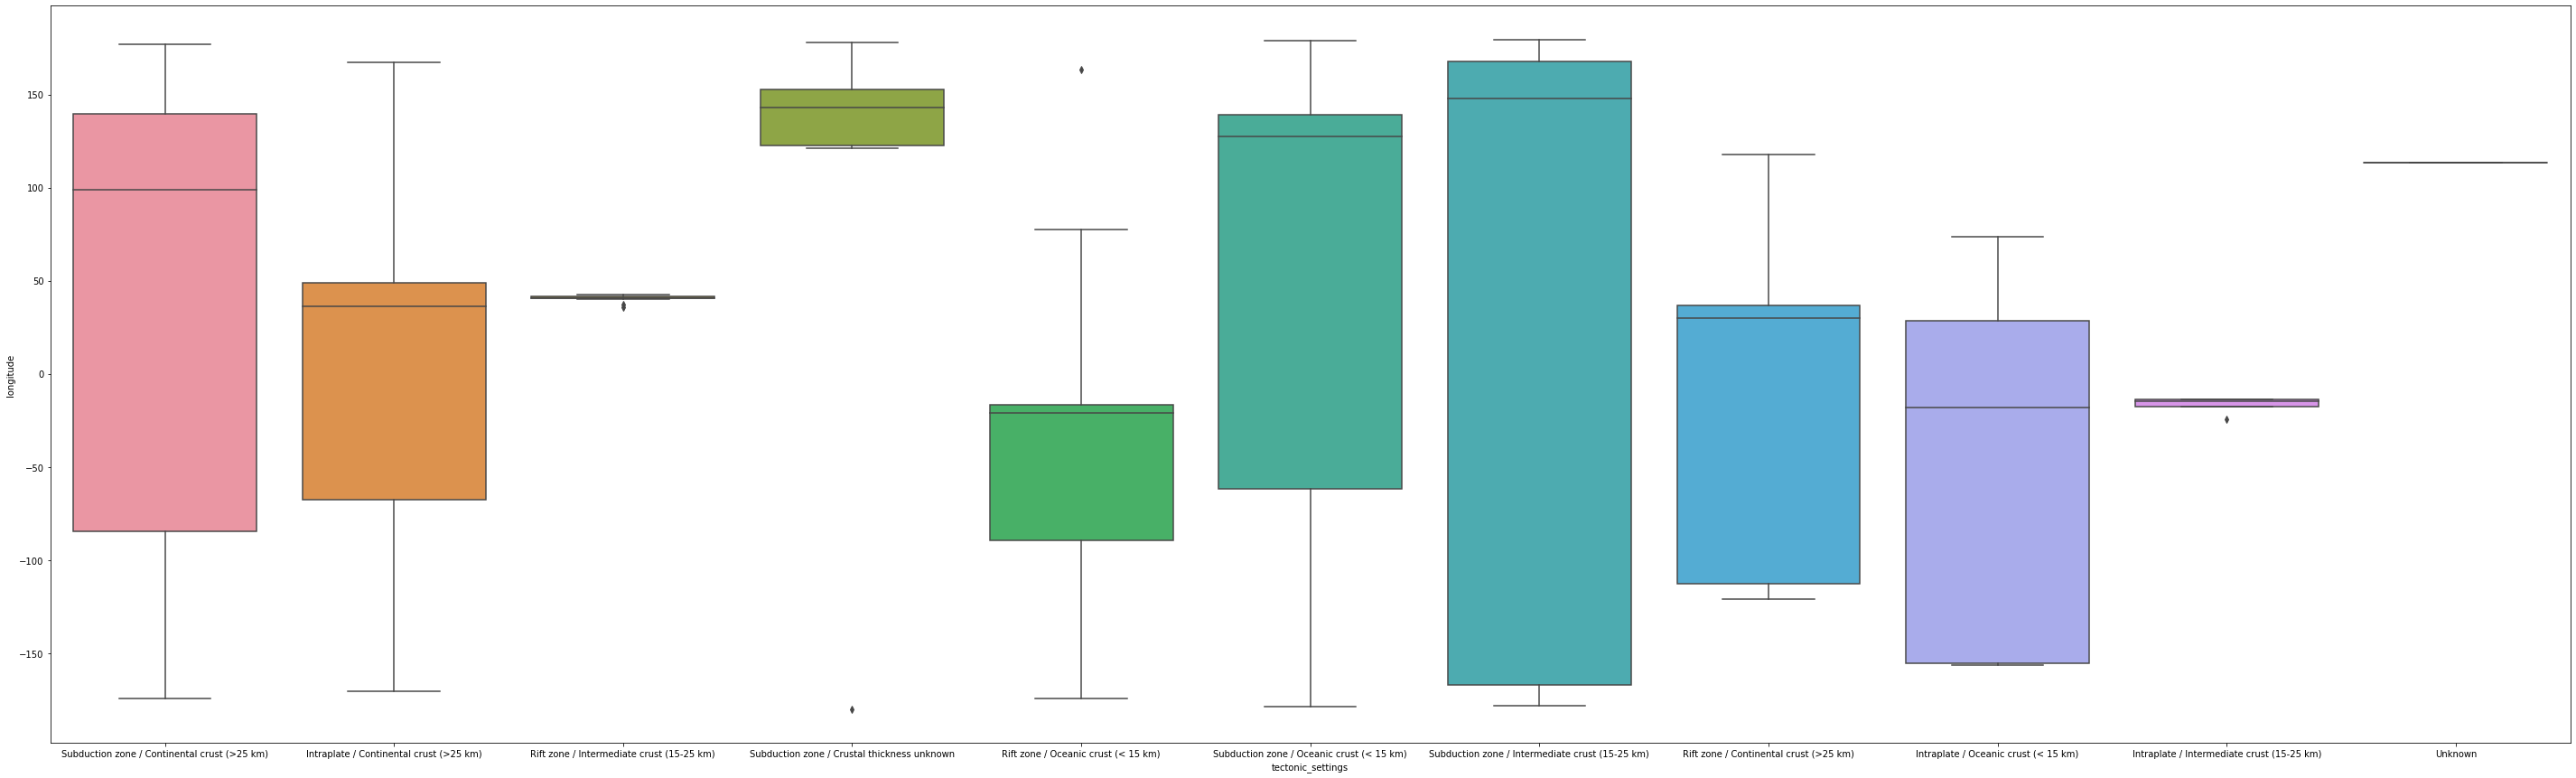

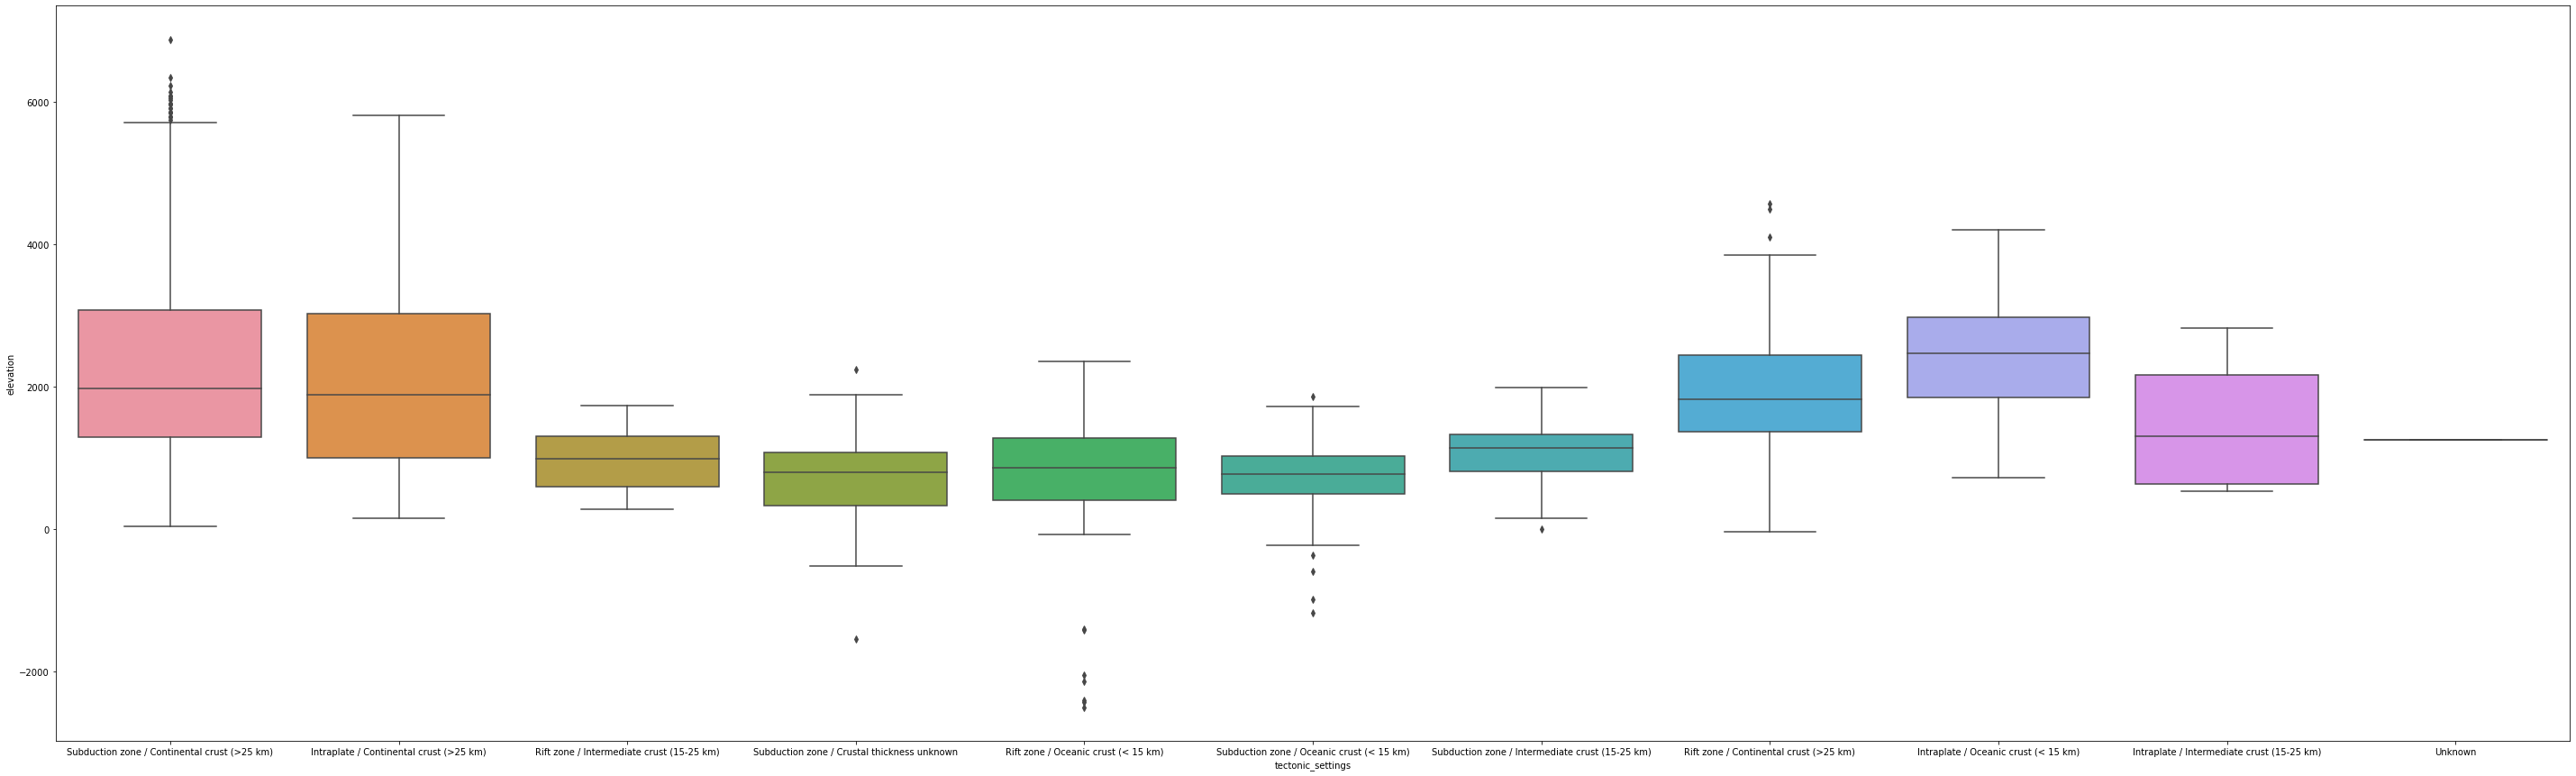

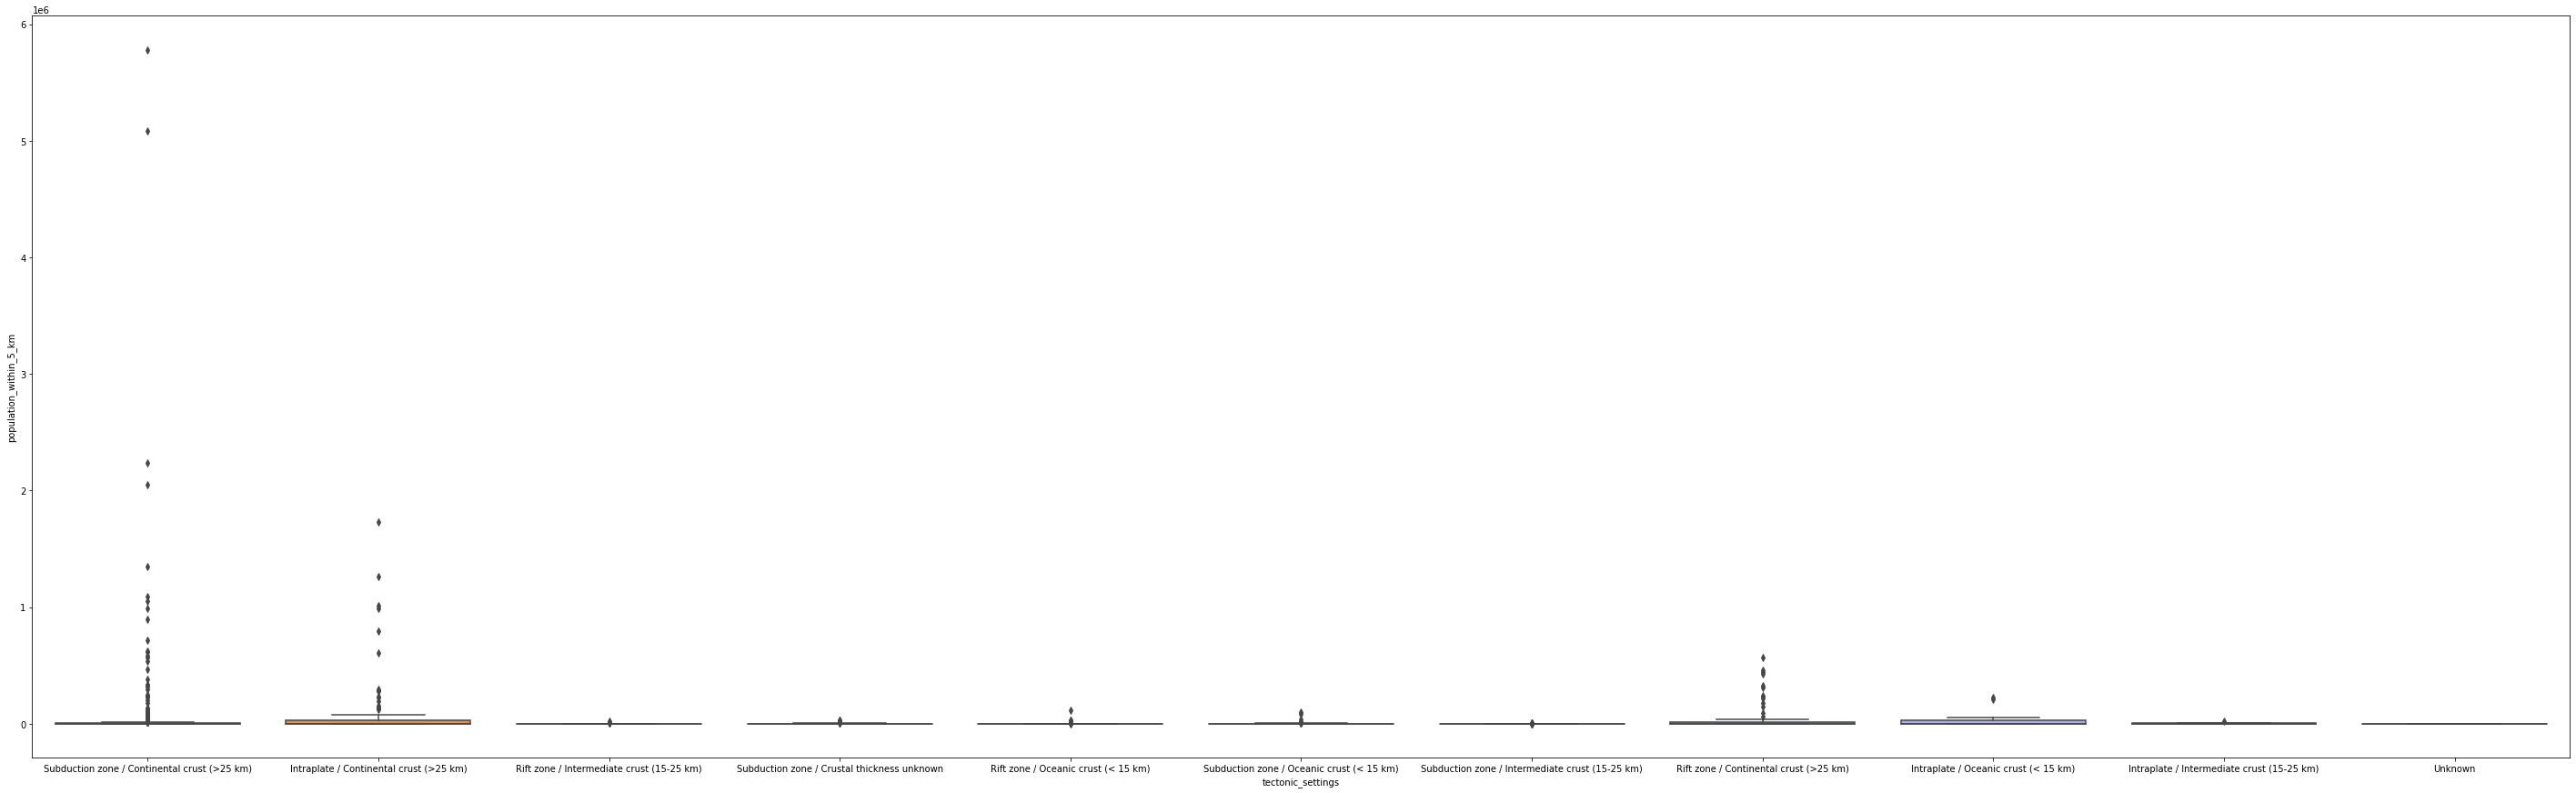

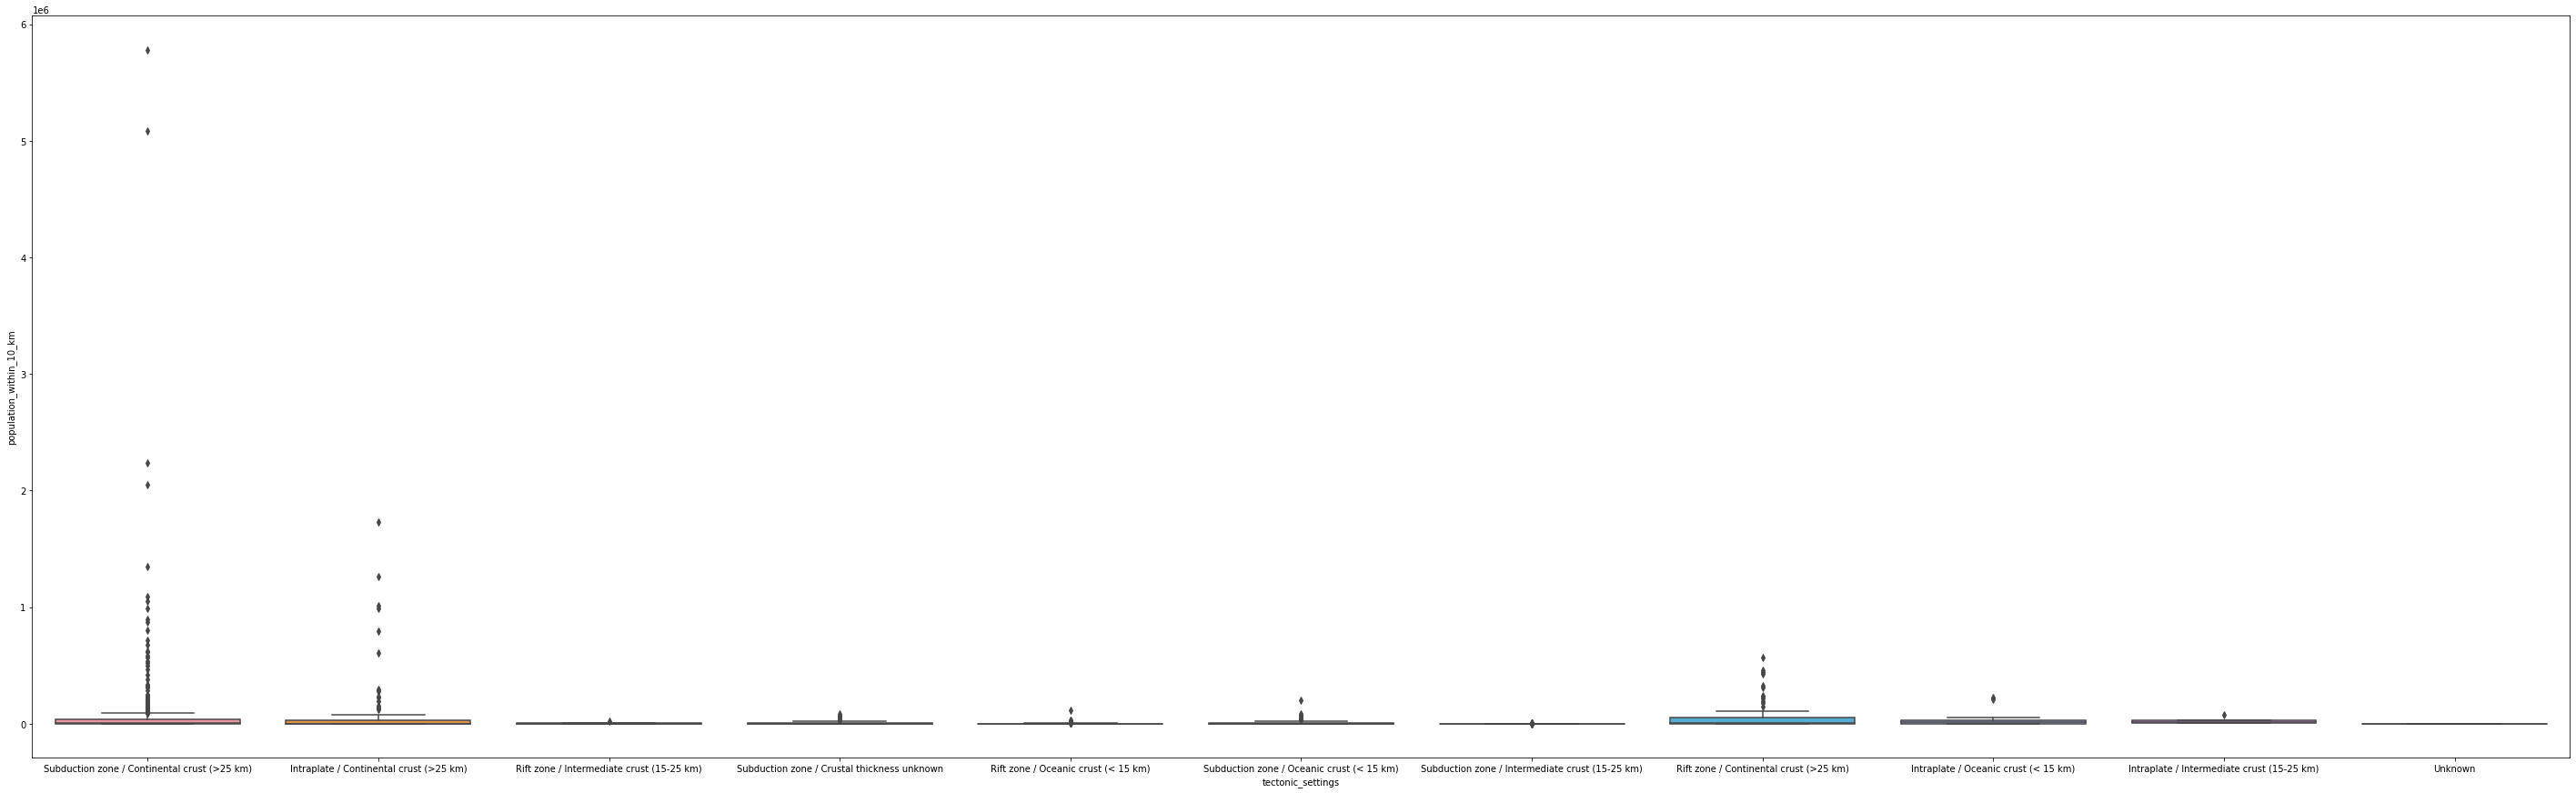

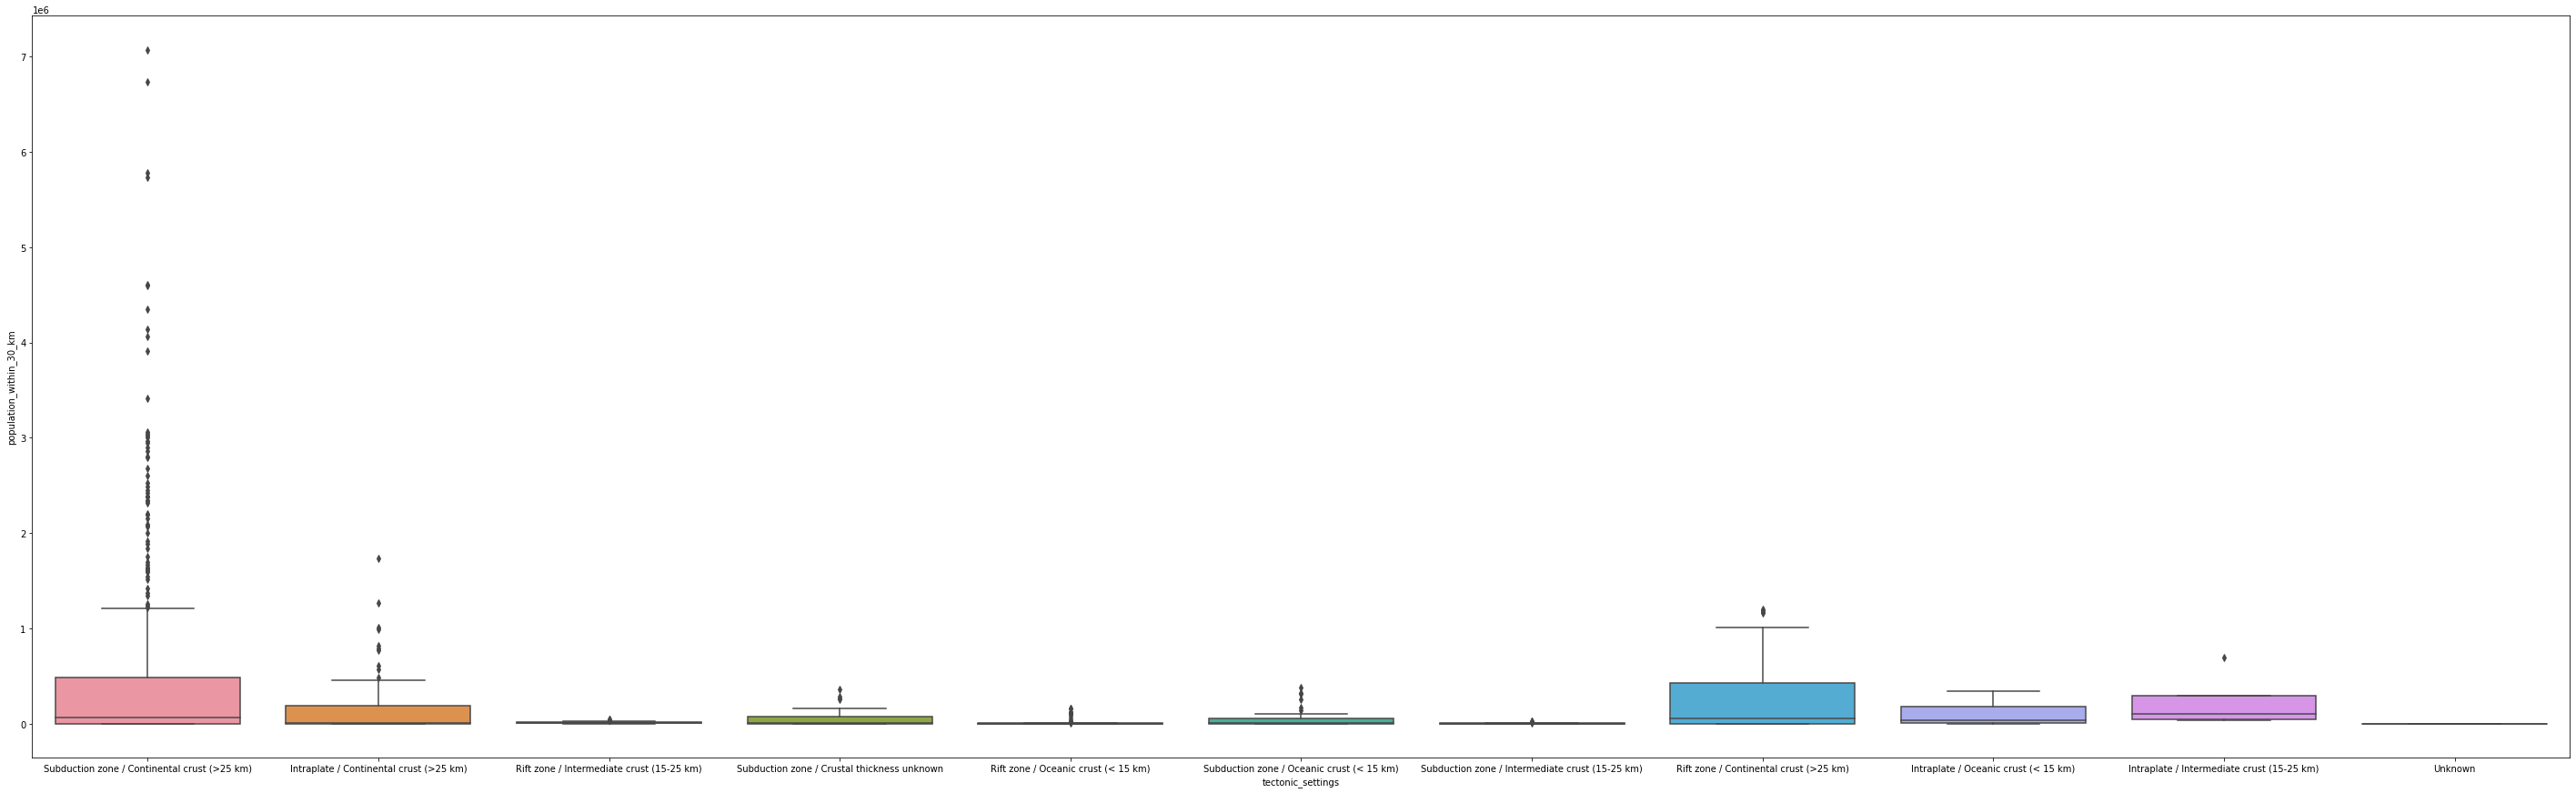

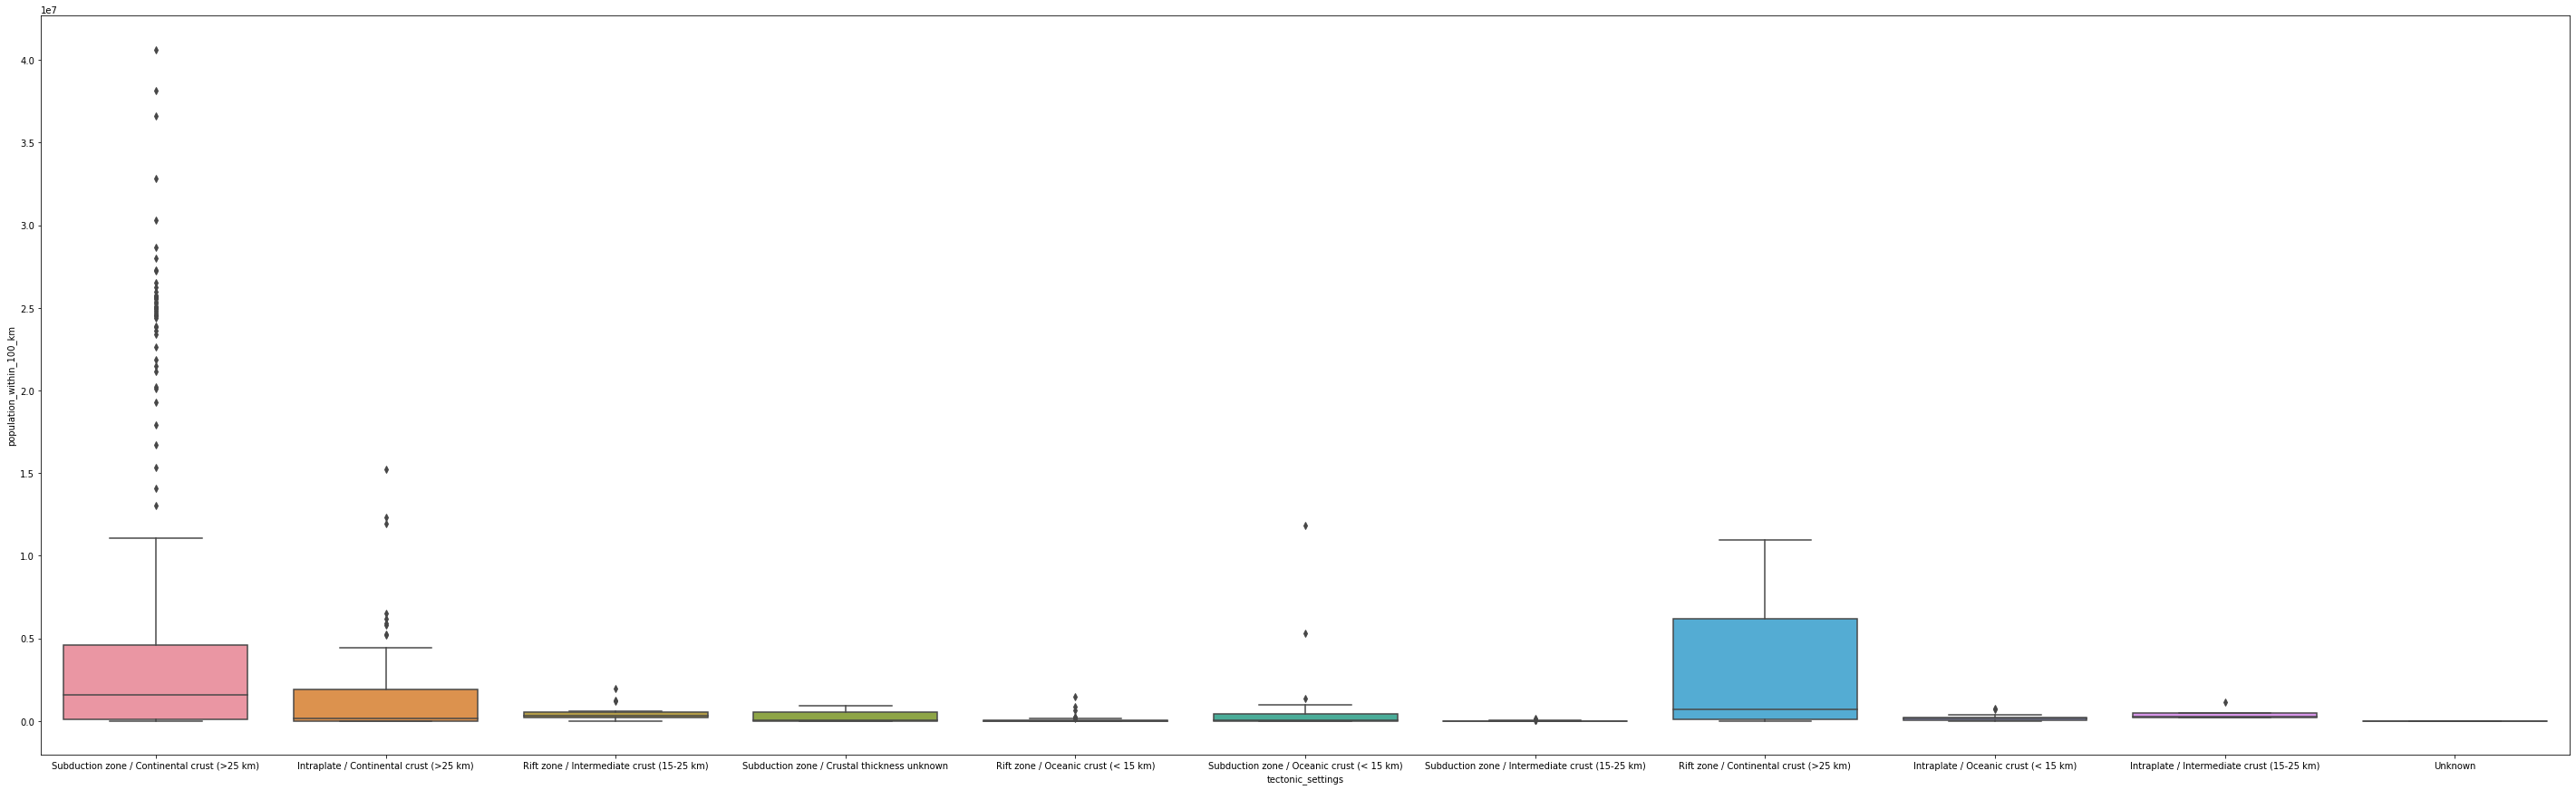

In [30]:
quant_names = ['latitude', 'longitude', 'elevation', 'population_within_5_km', 'population_within_10_km', 'population_within_30_km', 'population_within_100_km']

for col in quant_names:
    plt.figure(figsize=(50, 15))
    print(sns.boxplot(data=volcano, x='tectonic_settings', y=col))

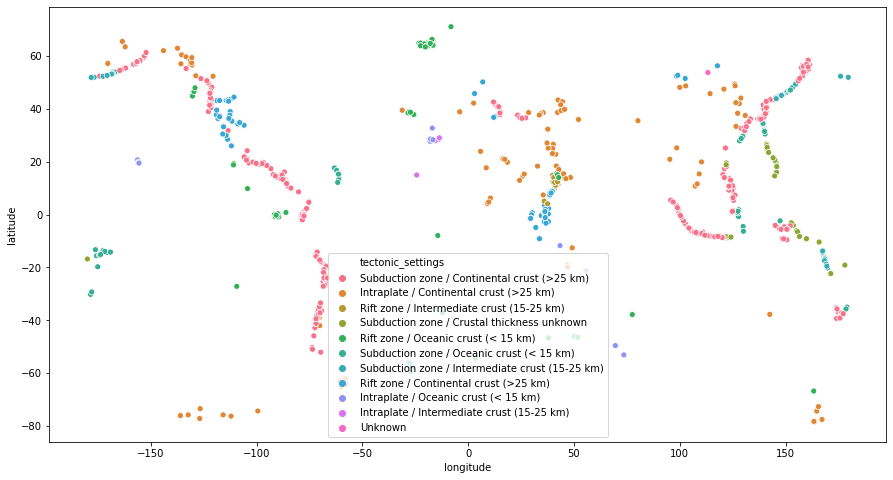

In [13]:
plt.figure(figsize=(15, 8))
sns.scatterplot(volcano.longitude, volcano.latitude, hue=volcano.tectonic_settings)

In [14]:
volcano.evidence_category.unique()

array(['Eruption Dated', 'Evidence Credible', 'Eruption Observed',
       'Evidence Uncertain', 'Unrest / Holocene'], dtype=object)

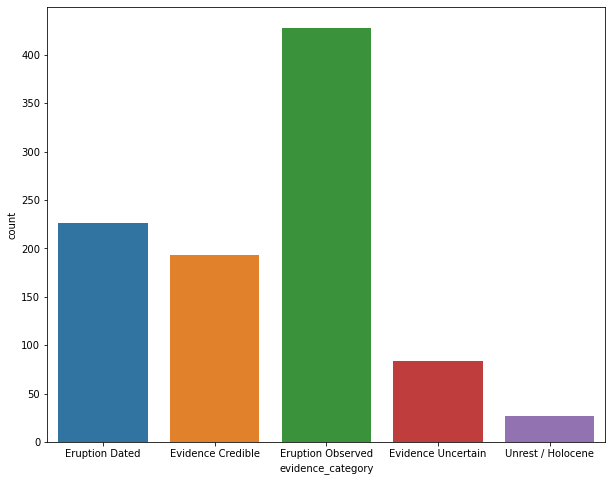

In [15]:
plt.figure(figsize=(10, 8))
sns.countplot(volcano.evidence_category)
plt.savefig('Volcano_evidence_category_count.png');

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


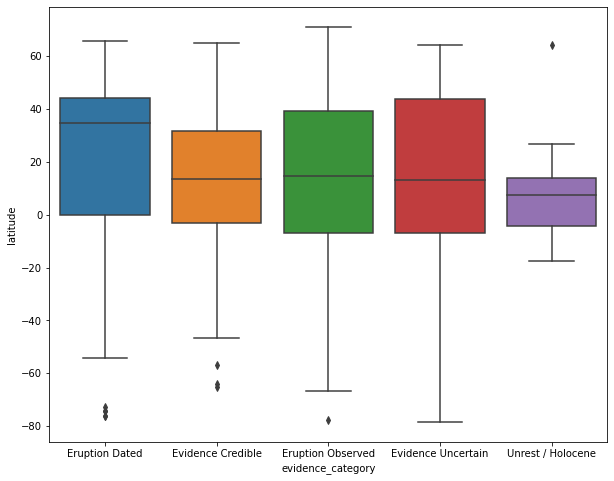

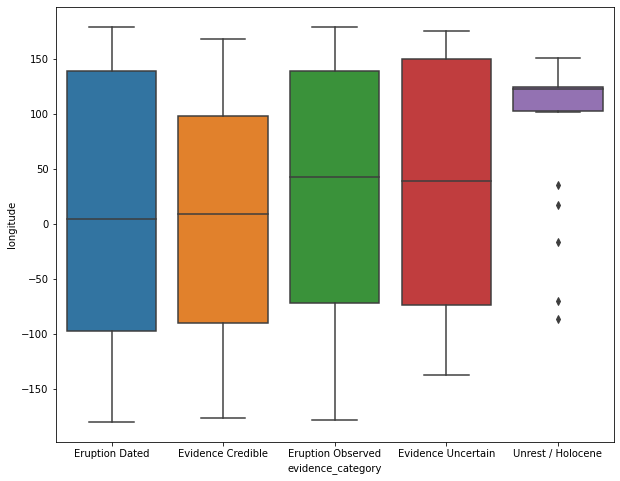

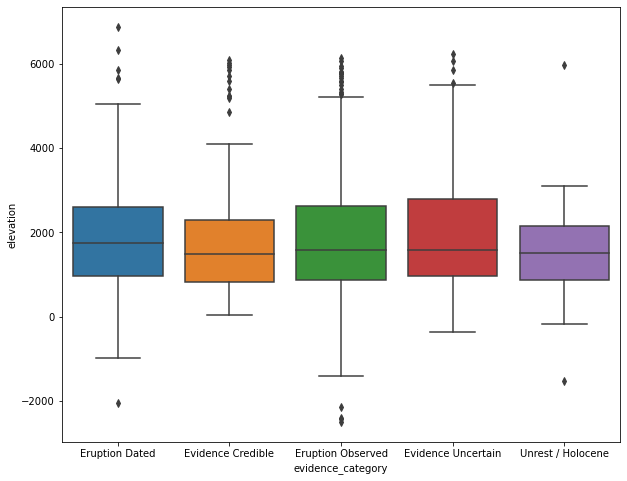

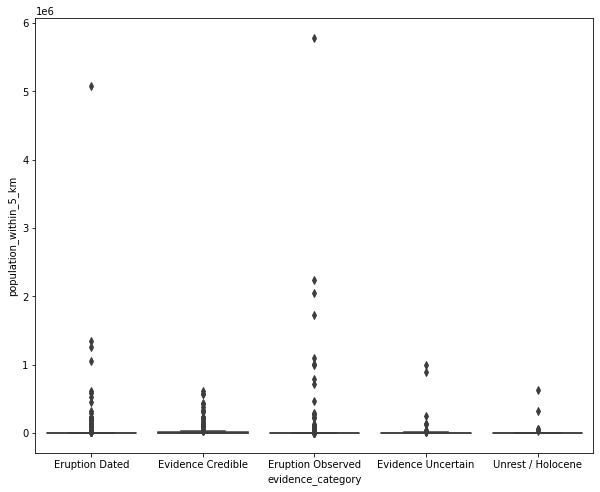

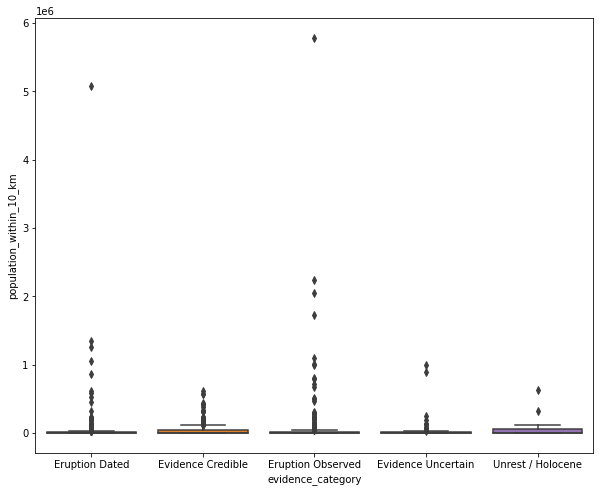

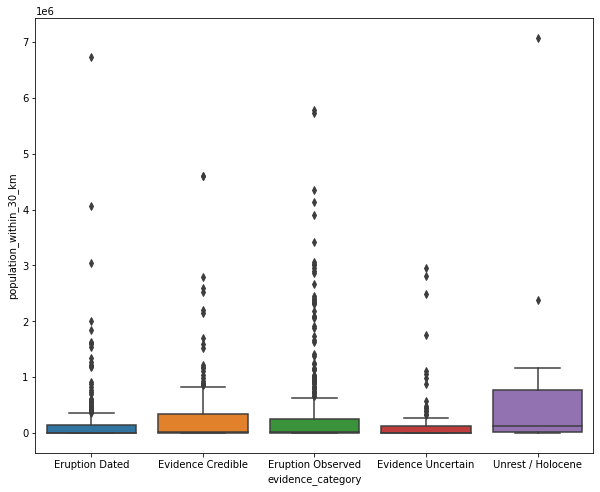

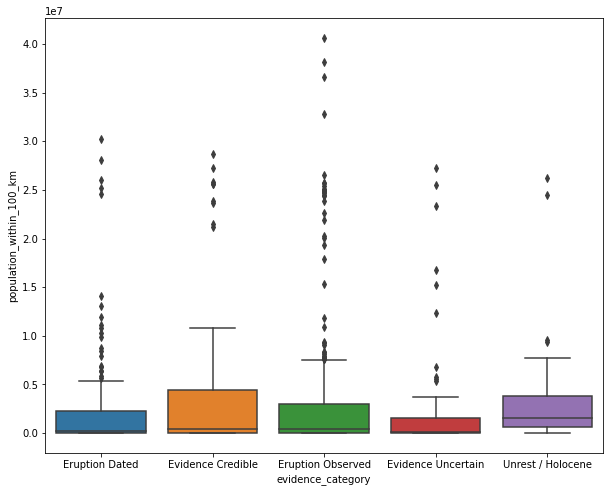

In [32]:
quant_names = ['latitude', 'longitude', 'elevation', 'population_within_5_km', 'population_within_10_km', 'population_within_30_km', 'population_within_100_km']

for col in quant_names:
    plt.figure(figsize=(10, 8))
    print(sns.boxplot(data=volcano, x='evidence_category', y=col))

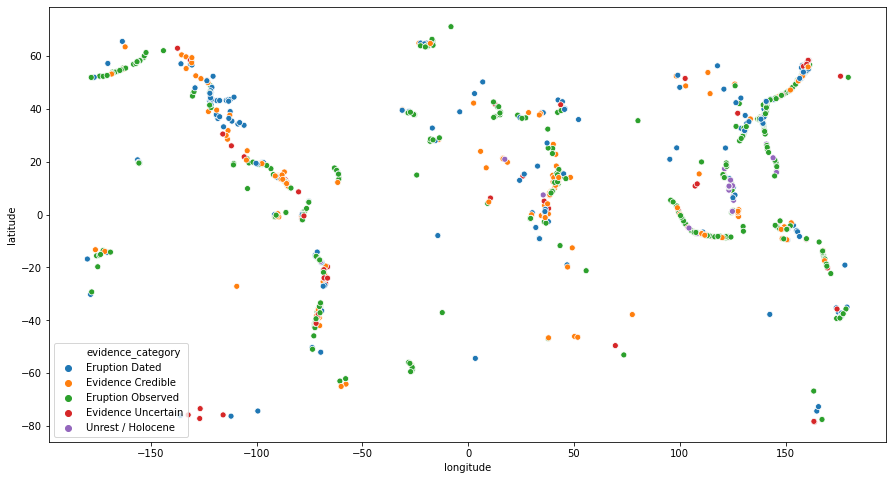

In [16]:
plt.figure(figsize=(15, 8))
sns.scatterplot(volcano.longitude, volcano.latitude, hue=volcano.evidence_category)

In [17]:
Events.head()

,volcano_number,volcano_name,eruption_number,eruption_start_year,event_number,event_type,event_remarks,event_date_year,event_date_month,event_date_day
0,210020,Chaine des Puys,10011,-4040,100001,Explosion,NaN,NaN,NaN,NaN
1,210020,Chaine des Puys,10011,-4040,100002,Scoria,NaN,NaN,NaN,NaN
2,210020,Chaine des Puys,10011,-4040,100003,Pyroclastic flow,NaN,NaN,NaN,NaN
3,210020,Chaine des Puys,10011,-4040,100004,Lava flow(s),NaN,NaN,NaN,NaN
4,210020,Chaine des Puys,10011,-4040,100005,Cinder cone formation,NaN,NaN,NaN,NaN


In [34]:
Events.describe()

,volcano_number,eruption_number,eruption_start_year,event_number,event_date_year,event_date_month,event_date_day
count,41322.000000,41322.000000,41322.000000,41322.000000,10007.000000,7132.000000,5923.000000
mean,296428.862616,15428.928029,850.534679,127402.193819,1365.646947,6.382081,15.461759
std,48713.188142,3190.705491,2298.526358,15453.718318,1707.332054,3.522029,8.959910
min,210010.000000,10001.000000,-11345.000000,100001.000000,-9650.000000,1.000000,1.000000
25%,263250.000000,12693.250000,1257.000000,113978.250000,1773.000000,3.000000,8.000000
50%,284210.000000,15334.500000,1884.000000,127832.500000,1912.000000,6.000000,15.000000
75%,342090.000000,18081.750000,1968.000000,141701.750000,1977.000000,9.000000,23.000000
max,600000.000000,22352.000000,2020.000000,153202.000000,2020.000000,12.000000,31.000000


In [35]:
Events.columns

Index(['volcano_number', 'volcano_name', 'eruption_number',
       'eruption_start_year', 'event_number', 'event_type', 'event_remarks',
       'event_date_year', 'event_date_month', 'event_date_day'],
      dtype='object')

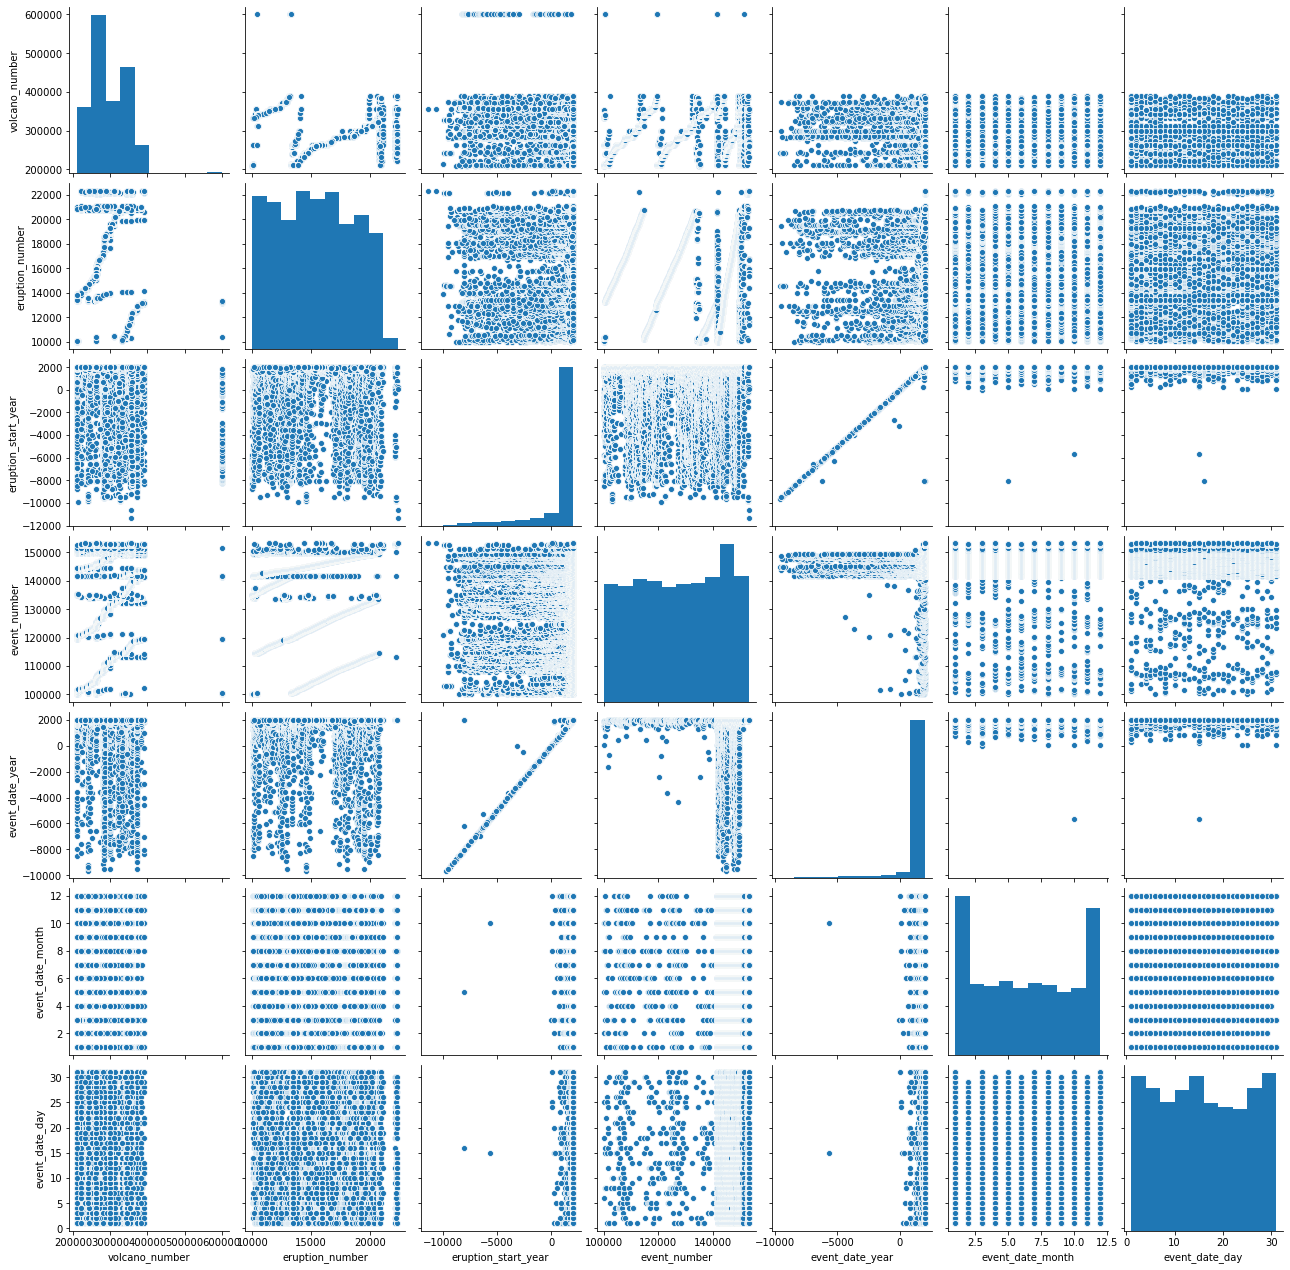

In [18]:
sns.pairplot(Events)
plt.savefig('Events_pairplots.png');

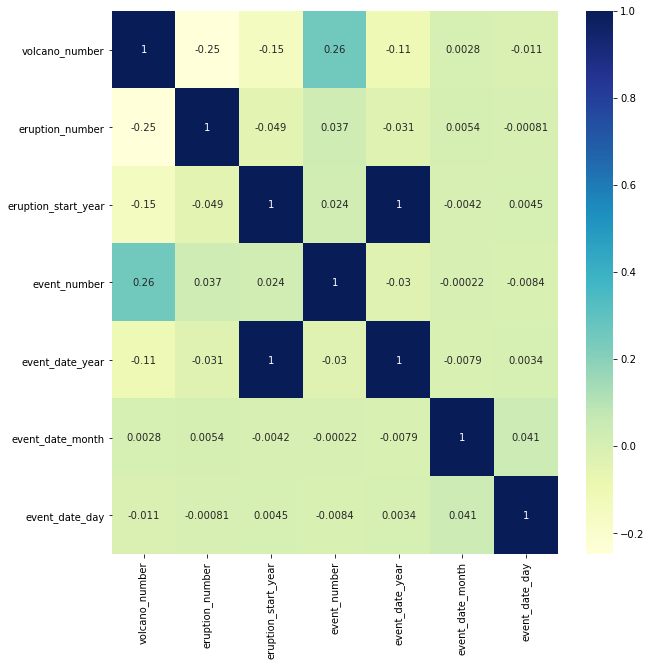

In [19]:
plt.figure(figsize=(10, 10))
correlation = Events.corr()
sns.heatmap(correlation, cmap='YlGnBu', annot=True)
plt.savefig('Events_corr_heatmap.png');

In [20]:
Events.event_type.unique()

array(['Explosion', 'Scoria', 'Pyroclastic flow', 'Lava flow(s)',
       'Cinder cone formation', 'Pumice', 'Flames', 'Phreatic activity',
       'Ash', 'Lapilli', 'Lahar or mudflow', 'Bombs',
       'Lava dome formation', 'Phreatomagmatic eruption',
       'Property damage', 'Earthquakes (undefined)', 'Blocks',
       'Lava lake', 'Fatalities', 'Evacuations', 'Lava fountains',
       'Tsunami', 'Caldera formation', 'Eruption cloud',
       'Seismicity (volcanic)', 'Partial collapse at end of eruption',
       'Volcanic tremor', 'Debris avalanches', 'Deformation (inflation)',
       'Deformation (deflation)', 'Loud audible noises',
       'Deformation (undefined)', 'Glow', 'Fauna kill',
       'Edifice destroyed', 'Lightning', 'Tephra', 'Crater formation',
       'Island formation', 'Spine formation', 'Earthquake (tectonic)',
       'Directed explosion', 'Mud', 'Fumarolic or solfataric',
       'Volcanic smoke', 'Liquid sulfur', 'Jokulhaup',
       'Fissure formation', 'Water fountain'

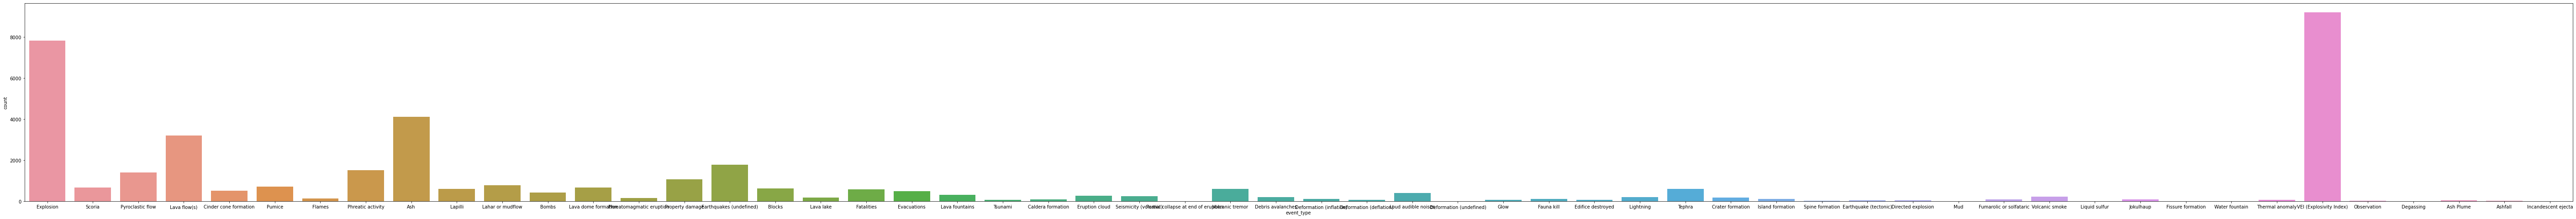

In [21]:
plt.figure(figsize=(100, 8))
sns.countplot(Events.event_type)
plt.savefig('Events_event_type_count.png');

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


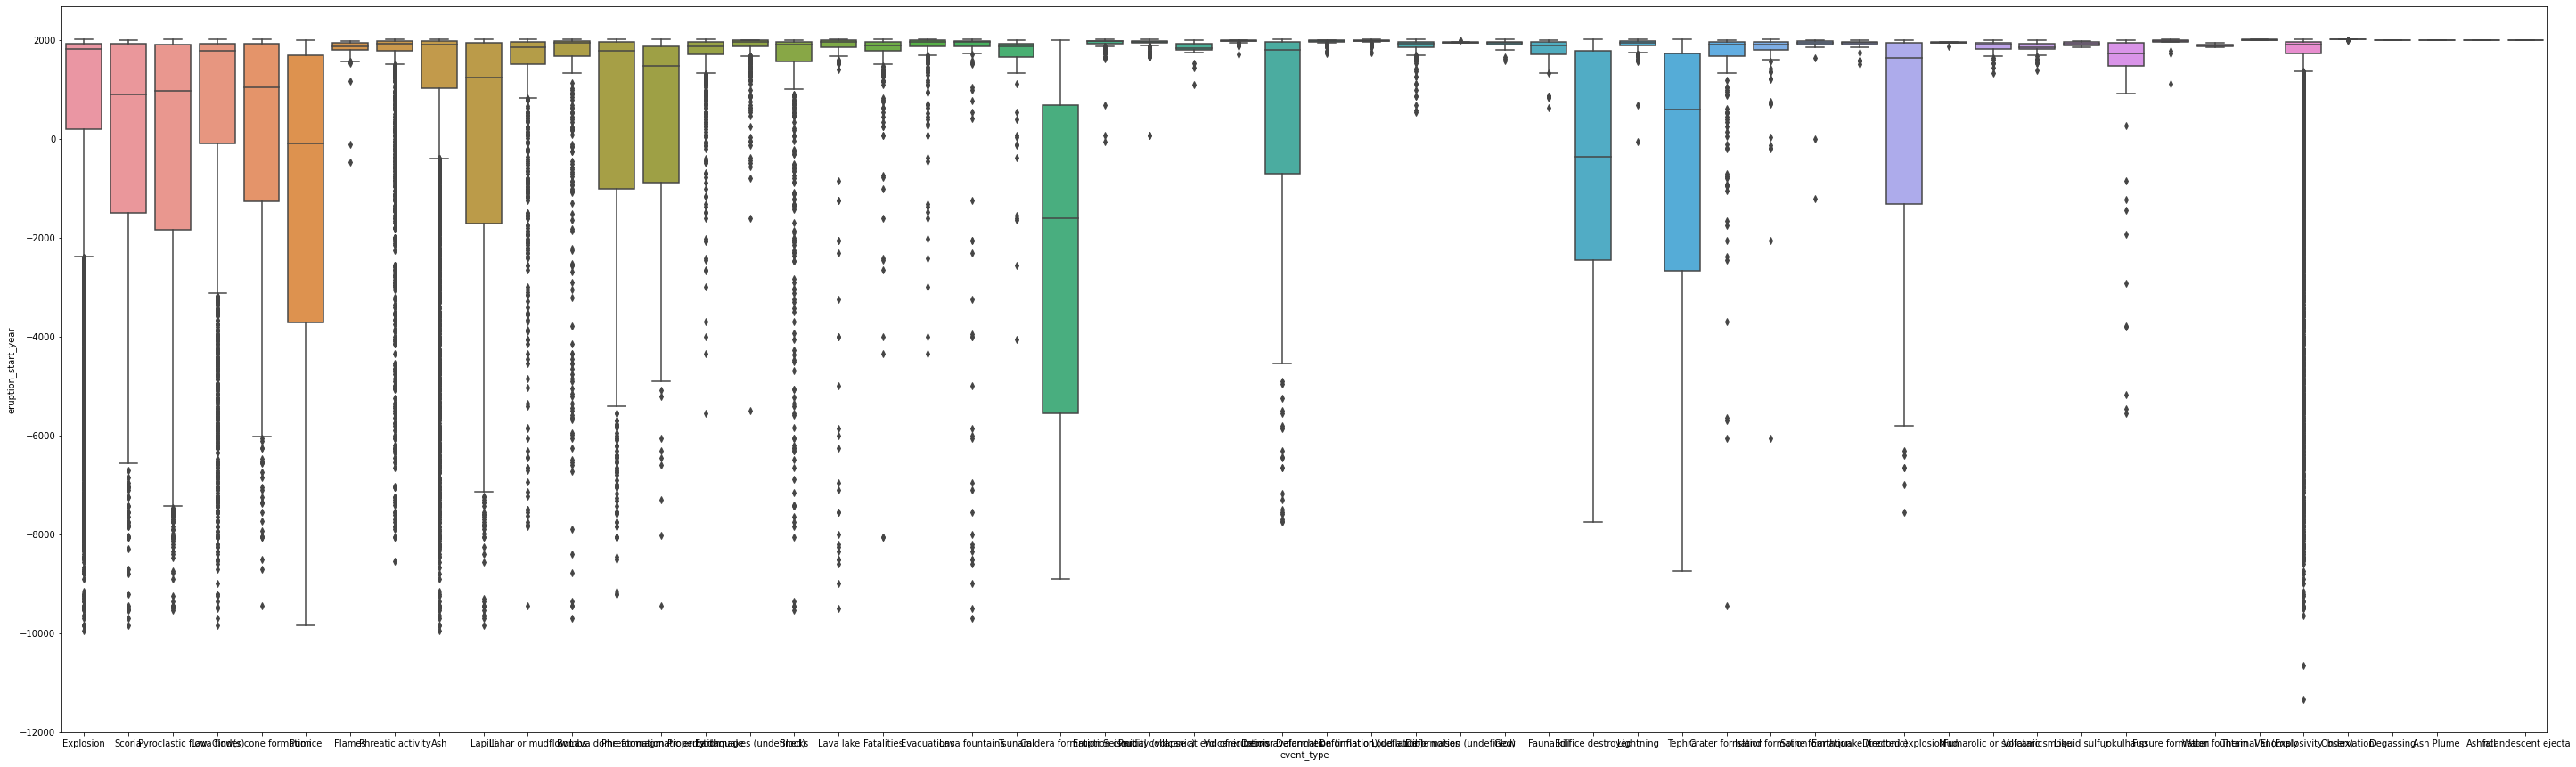

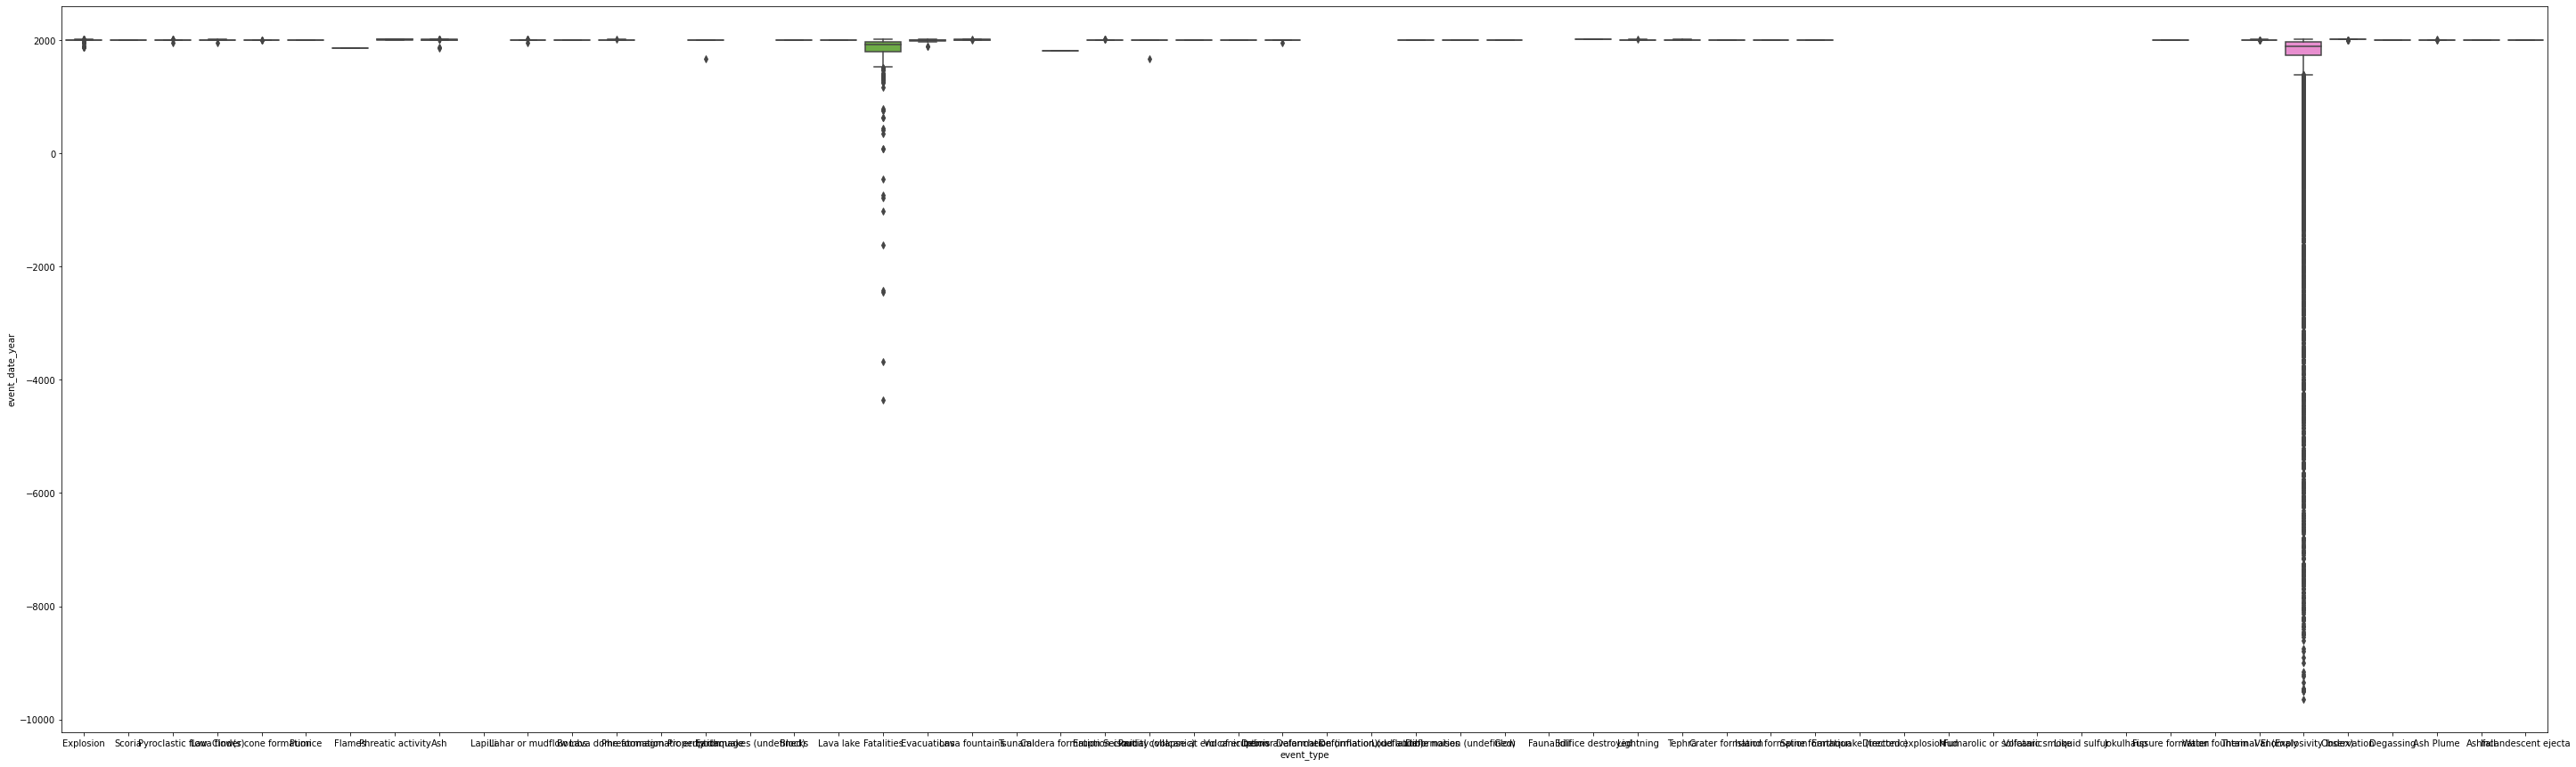

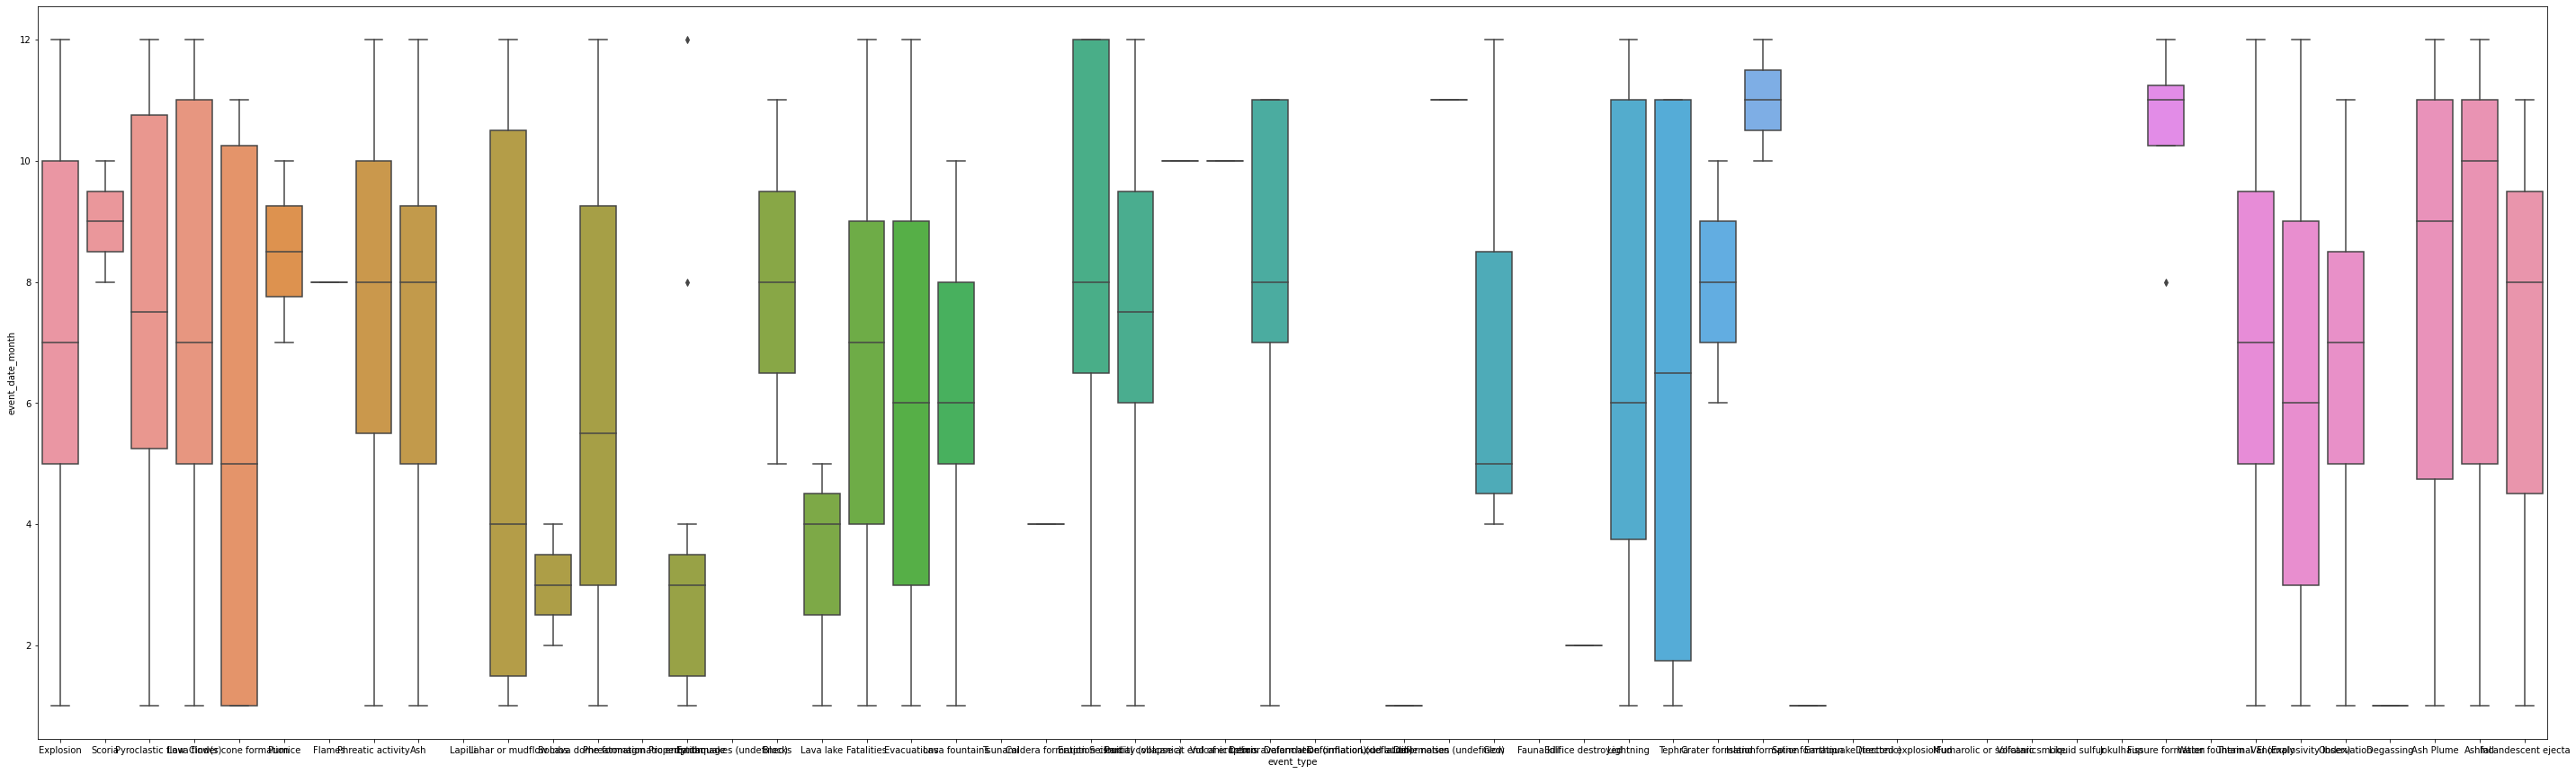

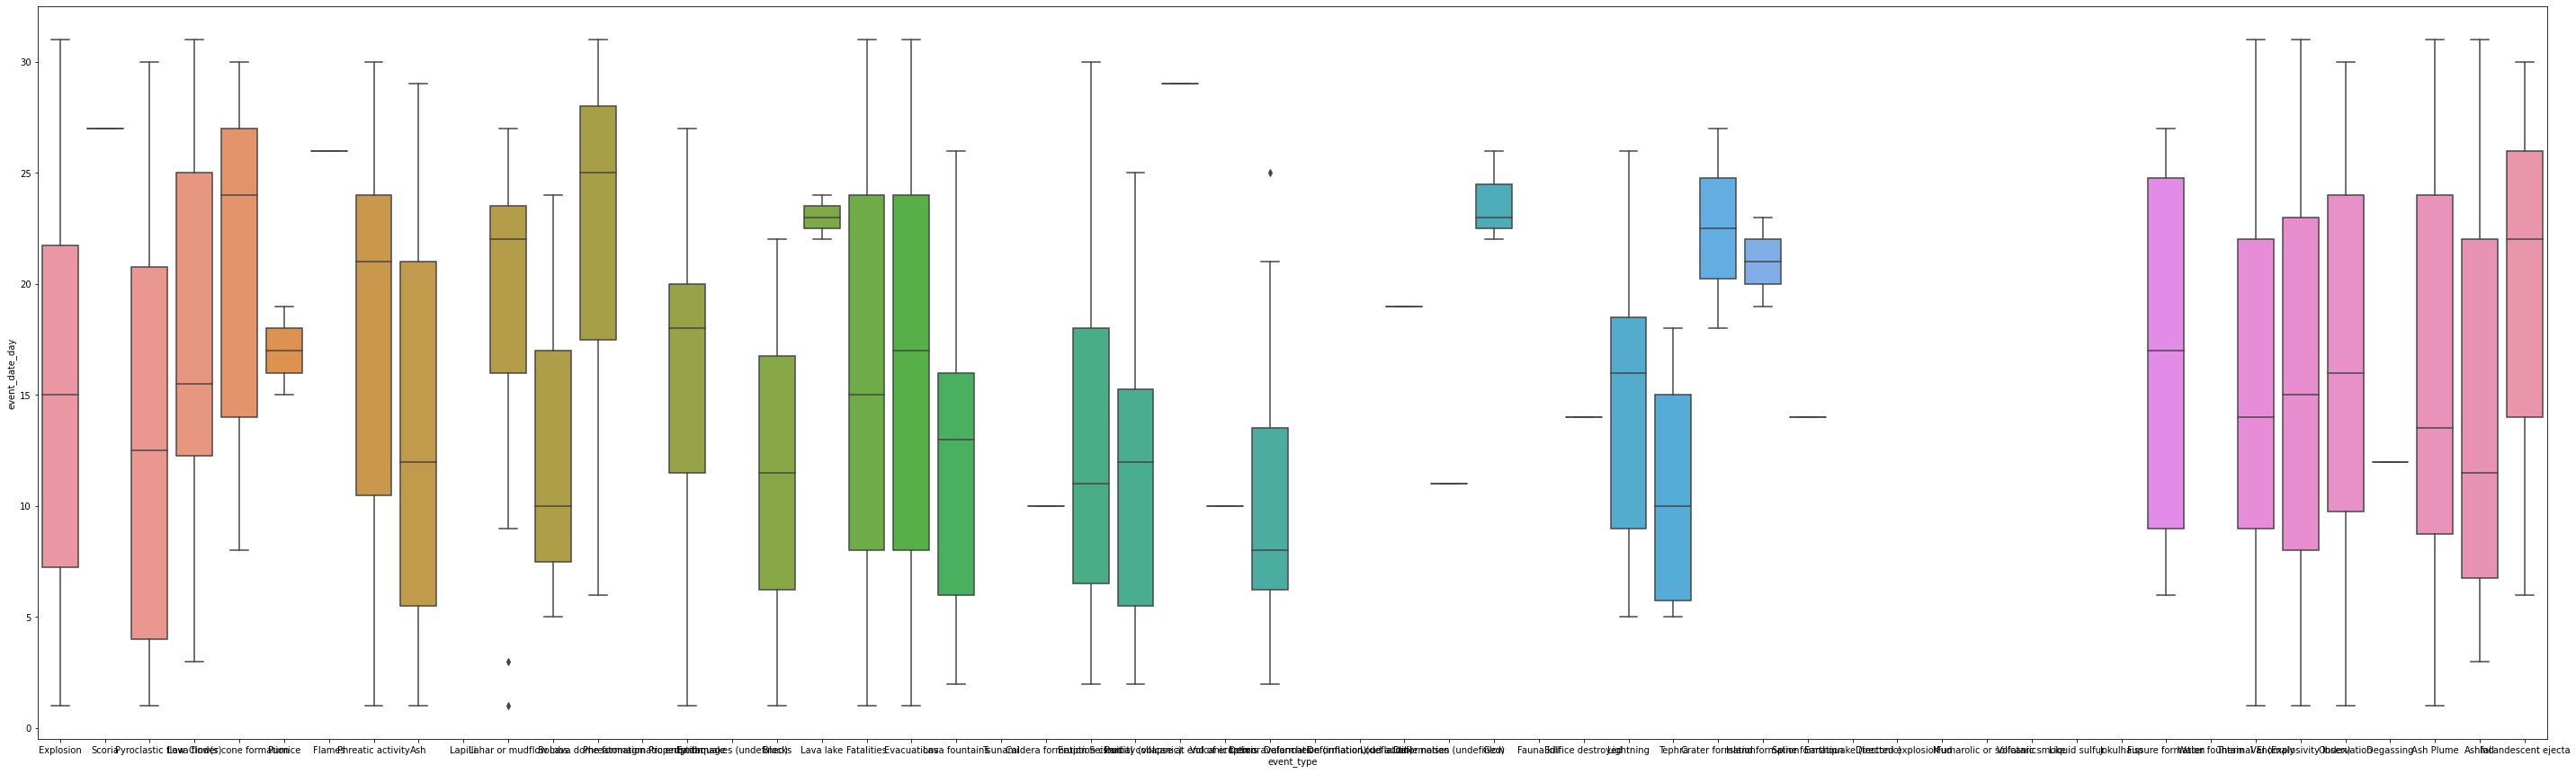

In [36]:
quant_names = ['eruption_start_year', 'event_date_year', 'event_date_month', 'event_date_day']

for col in quant_names:
    plt.figure(figsize=(50, 15))
    print(sns.boxplot(data=Events, x='event_type', y=col))